## DMART Sales Exploration

In [1]:
#importing required liabraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings 
warnings.simplefilter('ignore')

In [2]:
#importing csv file.
df=pd.read_csv("D:\Data Science\capstone\DT-Mart.csv")
df.head(7)

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
0,1/2/2015,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,1205.000000,866.294118,870.294118,334.705882,-1.0,869.294118,4.0,1
1,1/2/2015,Moderate,Named Day,Yingcheng,Hubei,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,320.823529,323.823529,204.411765,1.0,324.823529,3.0,1
2,1/2/2015,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,215.686274,142.098039,145.098039,70.588235,0.0,145.098039,3.0,1
3,1/2/2015,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,318.823529,323.823529,204.411765,0.0,323.823529,5.0,1
4,1/2/2015,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,137.450980,71.372549,76.372549,61.078431,1.0,77.372549,5.0,1
5,1/2/2015,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,178.431373,116.607843,119.607843,58.823529,1.0,120.607843,3.0,1
6,1/2/2015,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Jewellery,"Bangles, Bracelets & Armlets",216.862745,154.843137,172.843137,44.019608,1.0,173.843137,18.0,1


In [3]:
#checking for the shape of dataset.
df.shape

(6428, 18)

In [4]:
#information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order Date                       6428 non-null   object 
 1   Order Priority                   6428 non-null   object 
 2   Ship Type                        6428 non-null   object 
 3   City                             6428 non-null   object 
 4   State                            6428 non-null   object 
 5   Country                          6428 non-null   object 
 6   Region                           6428 non-null   object 
 7   Segment                          6428 non-null   object 
 8   Super Category                   6428 non-null   object 
 9   Category                         6428 non-null   object 
 10  Price                            6428 non-null   float64
 11  Operational/ Production Cost     5028 non-null   float64
 12  Selling Price       

In [5]:
#checking for null values present in dataset.
df.isnull().sum()

Order Date                            0
Order Priority                        0
Ship Type                             0
City                                  0
State                                 0
Country                               0
Region                                0
Segment                               0
Super Category                        0
Category                              0
Price                                 0
Operational/ Production Cost       1400
Selling Price                         0
Discount                              0
Shipping Cost                         0
Sales (shipping price included)       0
Profit                                0
Quantity                              0
dtype: int64

In [6]:
#dropping null values.
df1=df.dropna(subset=['Operational/ Production Cost'])

In [7]:
#verifying that all the null values are dropped or not.
df1.isnull().sum()

Order Date                         0
Order Priority                     0
Ship Type                          0
City                               0
State                              0
Country                            0
Region                             0
Segment                            0
Super Category                     0
Category                           0
Price                              0
Operational/ Production Cost       0
Selling Price                      0
Discount                           0
Shipping Cost                      0
Sales (shipping price included)    0
Profit                             0
Quantity                           0
dtype: int64

### Problem Statement: 

#### 1. Perform Basic EDA  

#### a. Boxplot – All Numeric Variables 

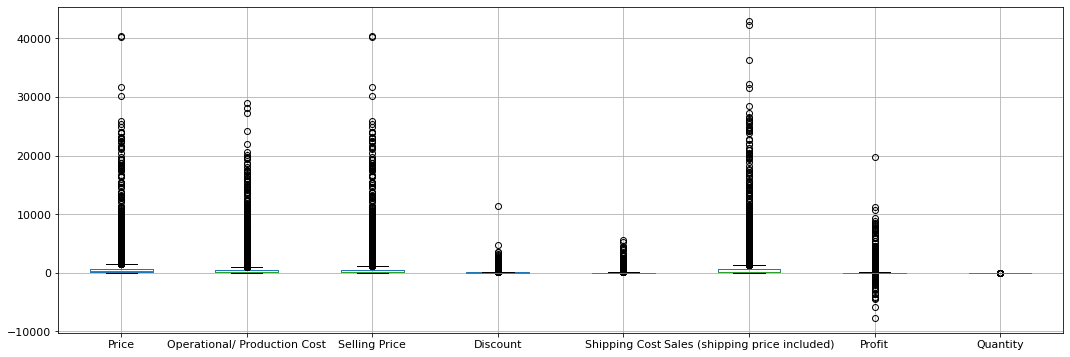

In [8]:
#creating boxplot for all numerical values.
df1.boxplot(figsize=(18,6),fontsize=11)
plt.show()

#### b. Histogram – All Numeric Variables 

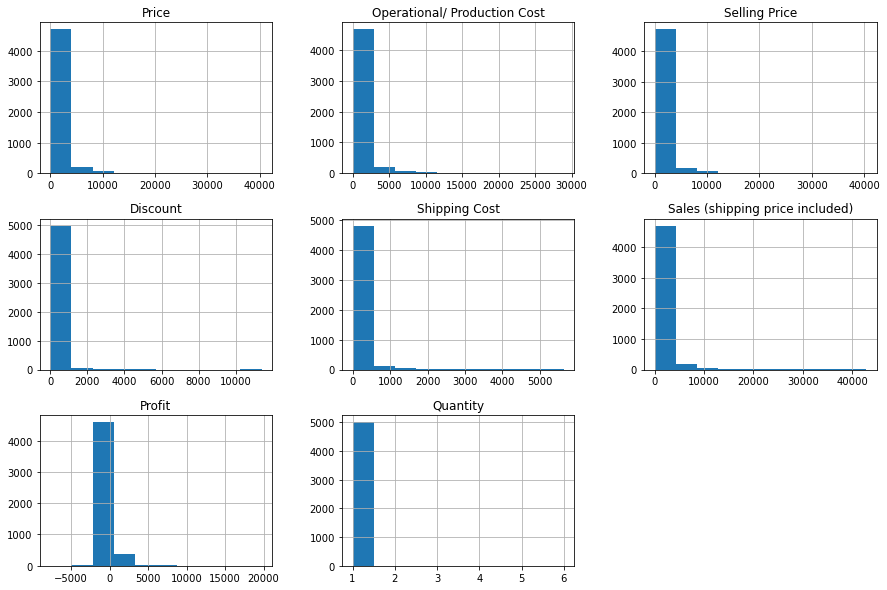

In [9]:
#creating histogram for all numerical value.
df1.hist(figsize=(15,10))
plt.show()

#### c. Distribution Plot – All Numeric Variables 

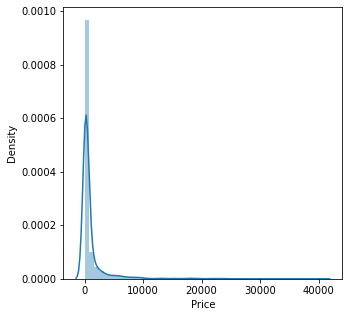

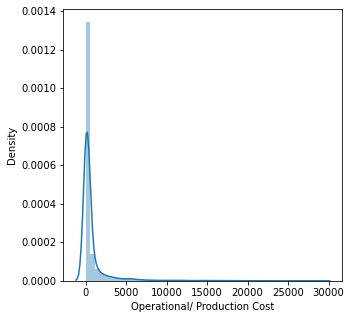

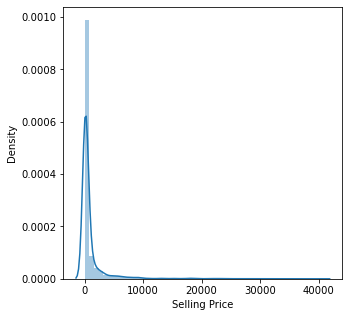

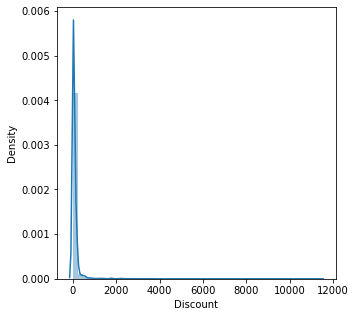

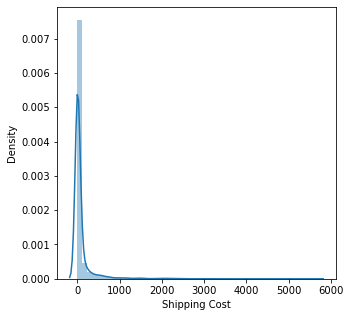

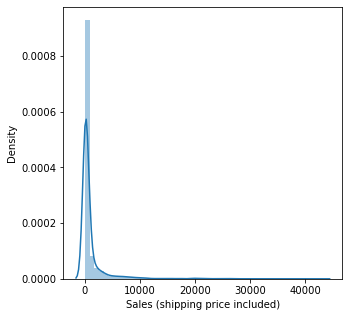

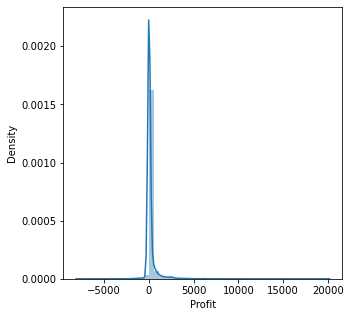

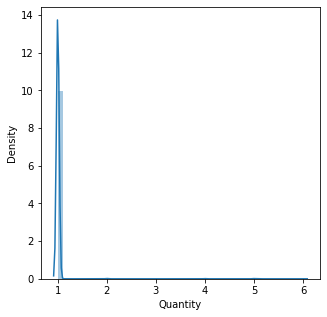

In [10]:
#creating distribution plot for all numerical values of dataset.
num_val = ['Price','Operational/ Production Cost','Selling Price','Discount','Shipping Cost','Sales (shipping price included)',
             'Profit','Quantity']
for i in num_val:
    plt.figure(figsize=(5,5))
    sns.distplot(df1[i])

#### d. Aggregation for all numerical Columns 

In [11]:
#calculating aggregate for all numerical values in dataset.
df1.groupby('Region').aggregate(['min', np.median, max,sum,np.mean])

Price                                                     \
                      min      median         max           sum         mean   
Region                                                                         
Central Asia     9.607843  254.705882  40395.4054  2.545003e+06  1052.959367   
North Asia       7.058824  250.000000  40183.7735  2.573076e+06  1104.798708   
Southeast Asia  29.215686  202.745098  10531.4735  2.185781e+05   775.099555   

               Operational/ Production Cost                          \
                                        min      median         max   
Region                                                                
Central Asia                      -3.078431  167.679200  28046.6595   
North Asia                       -13.470588  161.510400  28953.8236   
Southeast Asia                    -2.392157  132.960784   9977.7536   

                                          ...      Profit                     \
                         sum        mean  ...         min median         max   
Region                                    ...                                  
Central Asia    1.939242e+06  802.334268  ... -4476.44580   16.0  19747.0999   
North Asia      1.904104e+06  817.562803  ... -7698.94280   16.0  11229.9499   
Southeast Asia  1.869649e+05  662.996181  ... -4157.95346   15.0   2656.2292   

                                          Quantity                             
                          sum        mean      min median max   sum      mean  
Region                                                                         
Central Asia    396851.837560  164.191906        1    1.0   4  2425  1.003310  
North Asia      467857.818510  200.883563        1    1.0   6  2356  1.011593  
Southeast Asia   13857.170973   49.138904        1    1.0   1   282  1.000000  

[3 rows x 40 columns]

#### e. Unique Values across all columns

In [12]:
#getting unique values using lambda function.
print(df1.apply(lambda x: x.unique()))

Order Date                         [1/2/2015, 1/6/2015, 1/7/2015, 1/8/2015, 1/9/2...
Order Priority                                        [Moderate, Low, High, Extreme]
Ship Type                          [Named Day, Standard Delivery, Next Day, Same ...
City                               [Dhaka, Yingcheng, Chongqing, Jaipur, Yuci, Sh...
State                              [Dhaka, Hubei, Chongqing, Rajasthan, Shanxi, S...
Country                            [Bangladesh, China, India, Singapore, Myanmar ...
Region                                    [Central Asia, North Asia, Southeast Asia]
Segment                                              [Retail, Corporate, Whole Sale]
Super Category                     [Baby Care , Jewellery , Automotive , Pet Supp...
Category                           [ Baby & Kids Gifts ,  Bangles, Bracelets & Ar...
Price                              [1205.0, 528.2352941, 215.6862745, 137.4509804...
Operational/ Production Cost       [866.2941176, 320.8235294, 142

#### f. Duplicate values across all columns 

In [13]:
#getting duplicate value across all column.
df1[df1.duplicated()]

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
109,2/2/2015,High,Next Day,Yunyang,Henan,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,190.196078,123.450980,127.450980,62.745098,0.0,127.450980,4.0,1
797,6/10/2015,Low,Standard Delivery,Delhi,Delhi,India,Central Asia,Retail,Mobiles & Accessories,Mobile Accessories,122.352941,81.941176,97.941176,24.411765,0.0,97.941176,16.0,1
2872,2/8/2017,Moderate,Named Day,Pune,Maharashtra,India,Central Asia,Retail,Mobiles & Accessories,Tablet Accessories,361.176471,179.980392,195.980392,165.196078,0.0,195.980392,16.0,1
3070,4/5/2017,High,Next Day,Xiamen,Fujian,China,North Asia,Retail,Mobiles & Accessories,Tablet Accessories,361.176471,177.980392,195.980392,165.196078,1.0,196.980392,18.0,1
3596,7/10/2017,Moderate,Named Day,Kanpur,Uttar Pradesh,India,Central Asia,Retail,Mobiles & Accessories,Tablet Accessories,186.078431,112.352941,127.352941,58.725490,-1.0,126.352941,15.0,1
3668,8/5/2017,High,Next Day,Huizhou,Guangdong,China,North Asia,Retail,Mobiles & Accessories,Tablet Accessories,186.078431,114.352941,127.352941,58.725490,1.0,128.352941,13.0,1
6338,12/11/2018,Low,Standard Delivery,Visakhapatnam,Andhra Pradesh,India,Central Asia,Retail,Pens & Stationery,Office Supplies,122.450980,93.941176,97.941176,24.509804,1.0,98.941176,4.0,1
6339,12/11/2018,Low,Standard Delivery,Visakhapatnam,Andhra Pradesh,India,Central Asia,Retail,Pens & Stationery,Office Supplies,122.450980,93.941176,97.941176,24.509804,1.0,98.941176,4.0,1


#### g. Correlation – Heatmap - All Numeric Variables

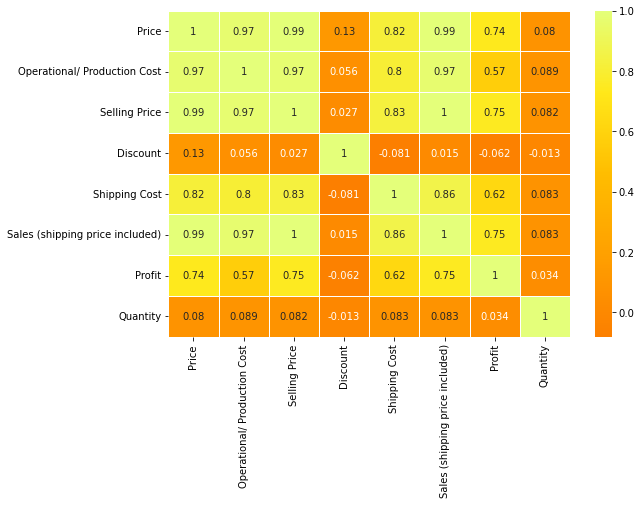

In [14]:
#checking for correlation between numerical values and ploting heatmap.
plt.figure(figsize=(9,6))
sns.heatmap(df1.corr(),cmap='Wistia_r',annot=True,linewidth=.5)
plt.show()

#### h. Regression Plot - All Numeric Variables

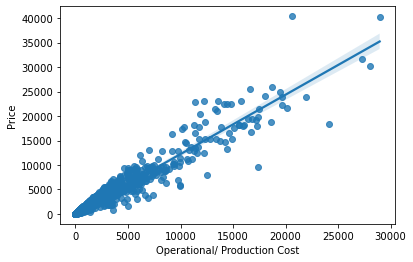

In [15]:
#plotting regression plot for numerical values.
sns.regplot(x='Operational/ Production Cost',y='Price',data=df1)
plt.show()

<AxesSubplot:xlabel='Selling Price', ylabel='Price'>

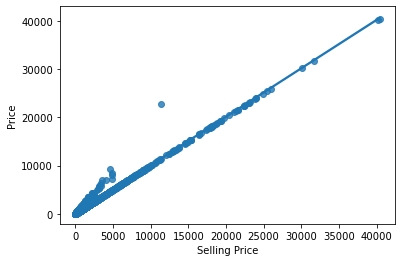

In [16]:
#plotting regression plot for numerical values.
sns.regplot(x='Selling Price',y='Price',data=df1)

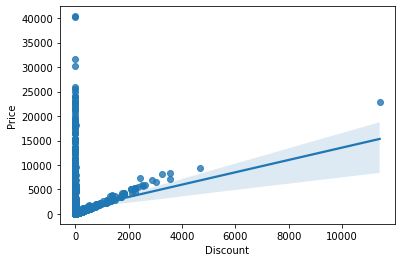

In [17]:
#plotting regression plot for numerical values.
sns.regplot(x='Discount',y='Price',data=df1)
plt.show()

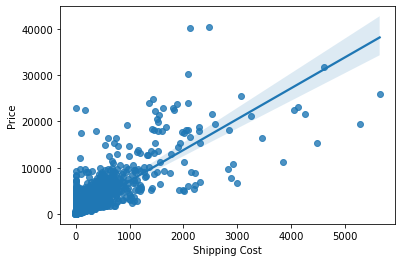

In [18]:
#plotting regression plot for numerical values.
sns.regplot(x='Shipping Cost',y='Price',data=df1)
plt.show()

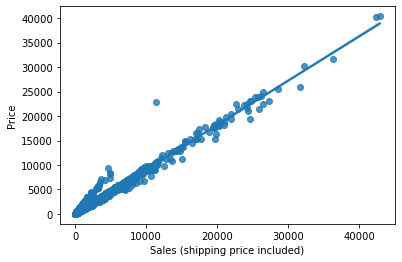

In [19]:
#plotting regression plot for numerical values.
sns.regplot(x='Sales (shipping price included)',y='Price',data=df1)
plt.show()

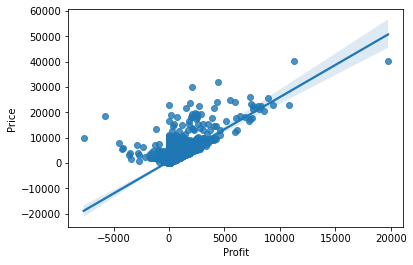

In [20]:
#plotting regression plot for numerical values.
sns.regplot(x='Profit',y='Price',data=df1)
plt.show()

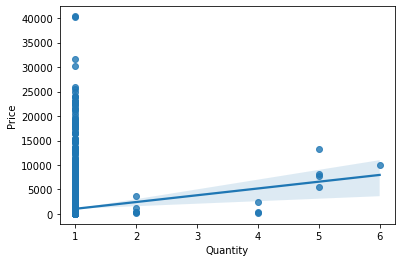

In [21]:
#plotting regression plot for numerical values.
sns.regplot(x='Quantity',y='Price',data=df1)
plt.show()

#### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

In [22]:
#seprating numeric and categorical values from dataset.
cat_val=['Order Priority', 'City', 'Category', 'Country', 'Segment', 'Order Date', 'State', 'Super Category', 
         'Region', 'Ship Type']
print('Numerical Columns')
print(num_val)
print('\nCategorical Columns')
print(cat_val)

Numerical Columns
['Price', 'Operational/ Production Cost', 'Selling Price', 'Discount', 'Shipping Cost', 'Sales (shipping price included)', 'Profit', 'Quantity']

Categorical Columns
['Order Priority', 'City', 'Category', 'Country', 'Segment', 'Order Date', 'State', 'Super Category', 'Region', 'Ship Type']


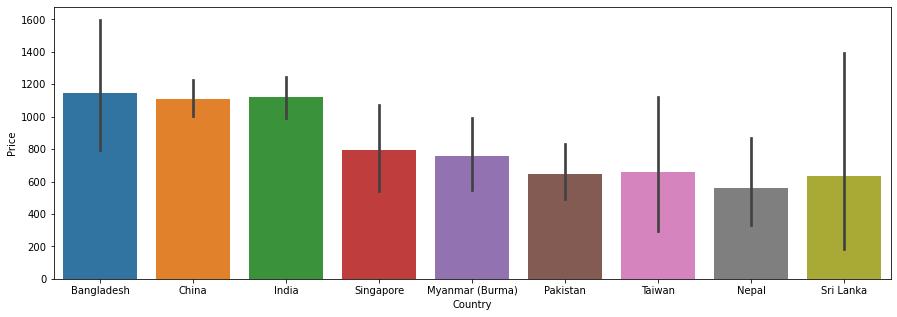

Visualizing Numerical Features with Country


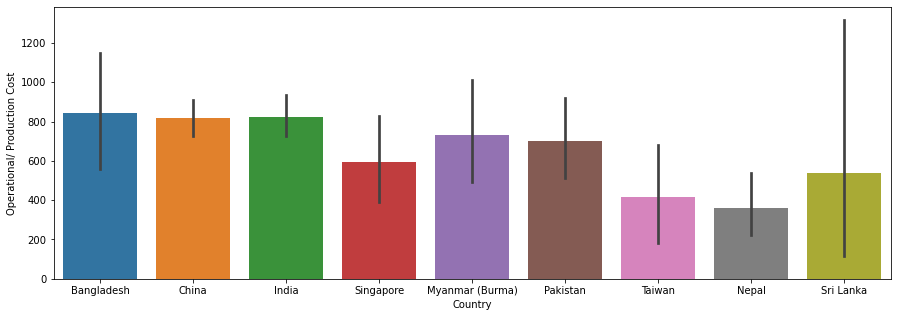

Visualizing Numerical Features with Country


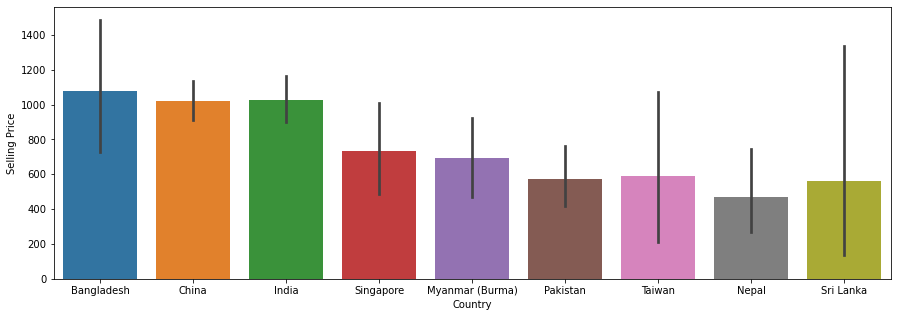

Visualizing Numerical Features with Country


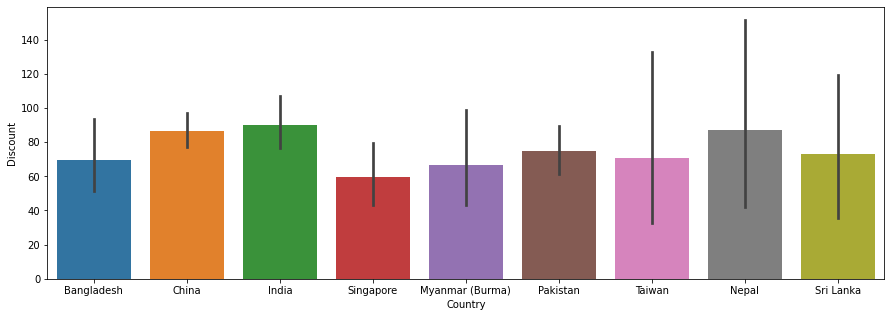

Visualizing Numerical Features with Country


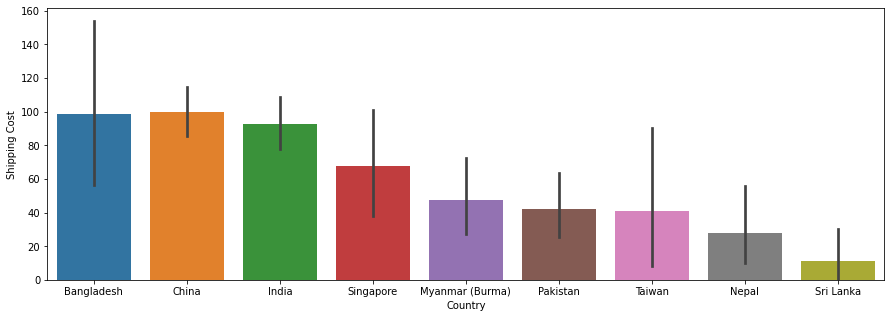

Visualizing Numerical Features with Country


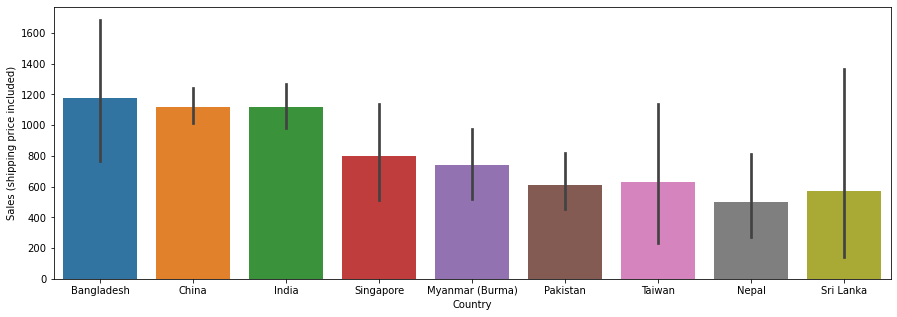

Visualizing Numerical Features with Country


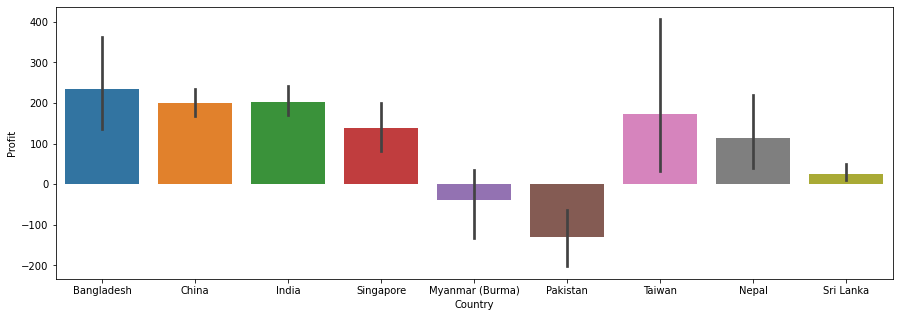

Visualizing Numerical Features with Country


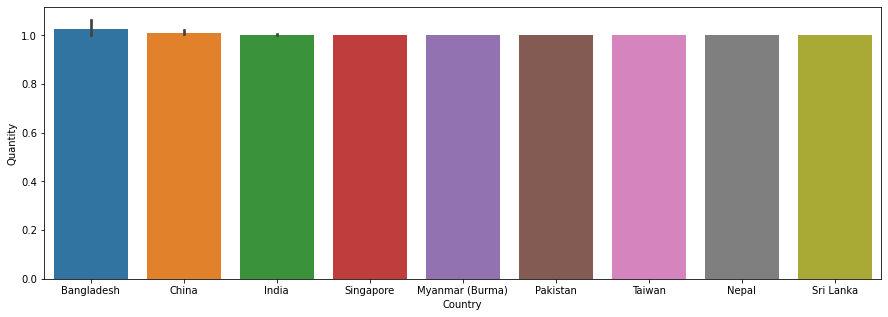

Visualizing Numerical Features with Country


In [23]:
#creating barplot to visualizing numerical feature with country.
for i in df1[num_val]:
    plt.figure(figsize=(15,5))
    sns.barplot(df1['Country'],df1[i])
    plt.show()
    print("Visualizing Numerical Features with Country")

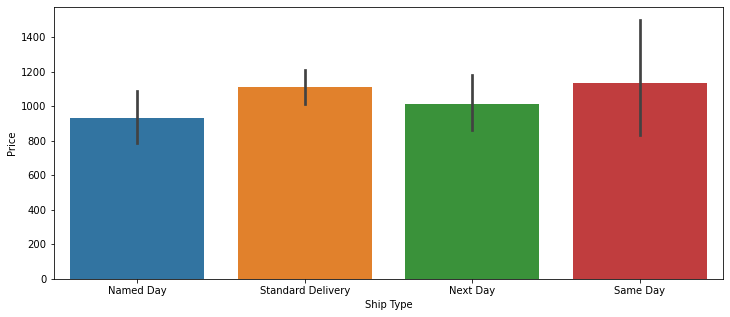

Visualizing Numerical Features with Ship Type


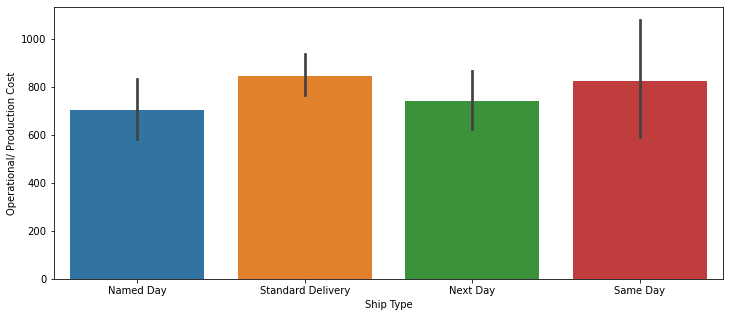

Visualizing Numerical Features with Ship Type


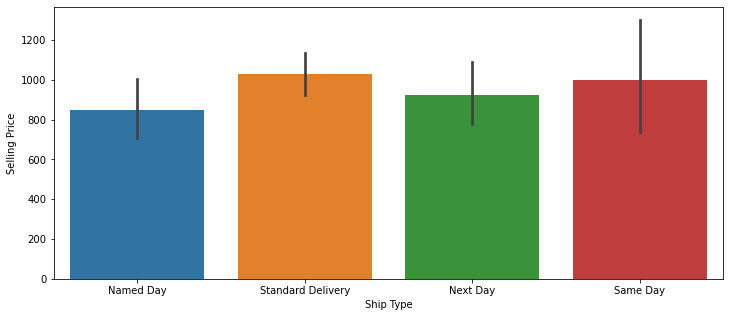

Visualizing Numerical Features with Ship Type


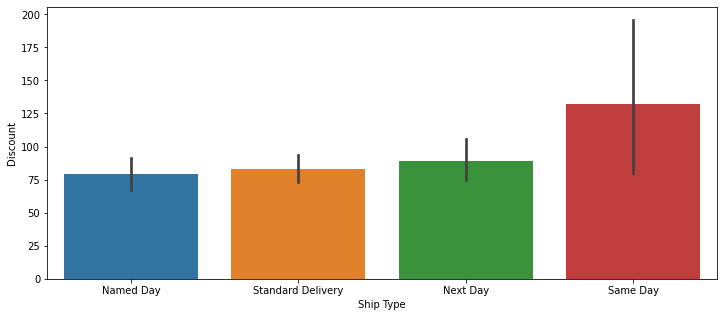

Visualizing Numerical Features with Ship Type


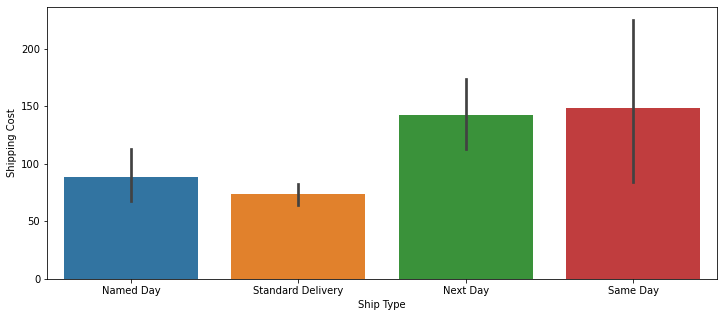

Visualizing Numerical Features with Ship Type


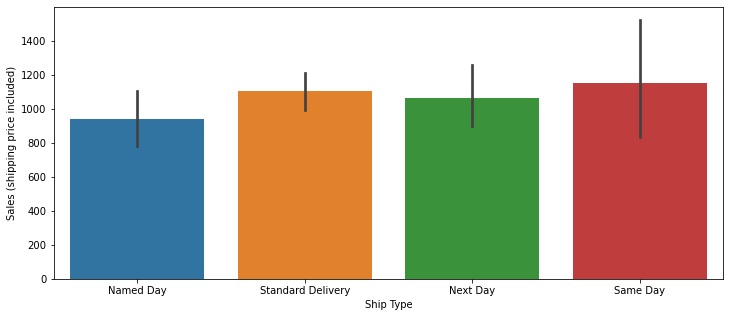

Visualizing Numerical Features with Ship Type


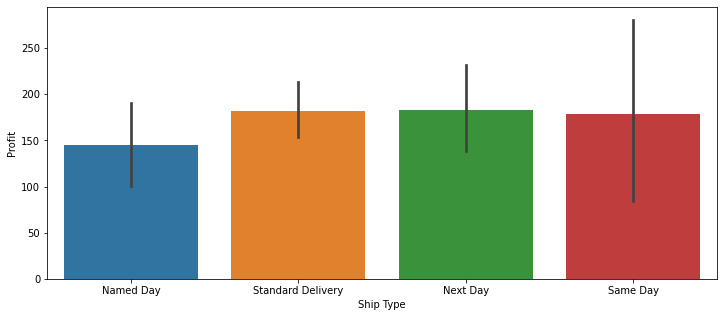

Visualizing Numerical Features with Ship Type


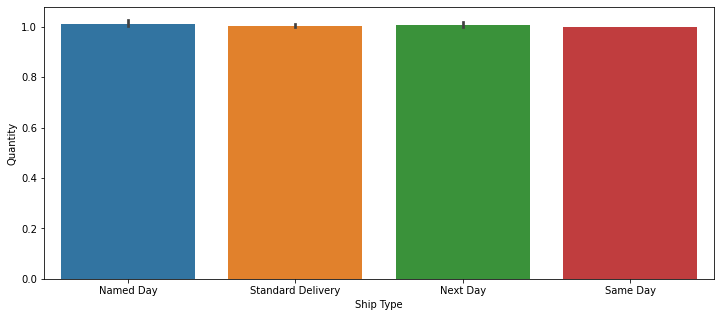

Visualizing Numerical Features with Ship Type


In [24]:
#creating plot to Visualizing Numerical Features with Ship Type.
for i in df1[num_val]:
    plt.figure(figsize=(12,5))
    sns.barplot(df1['Ship Type'],df1[i])
    plt.show()
    print("Visualizing Numerical Features with Ship Type")

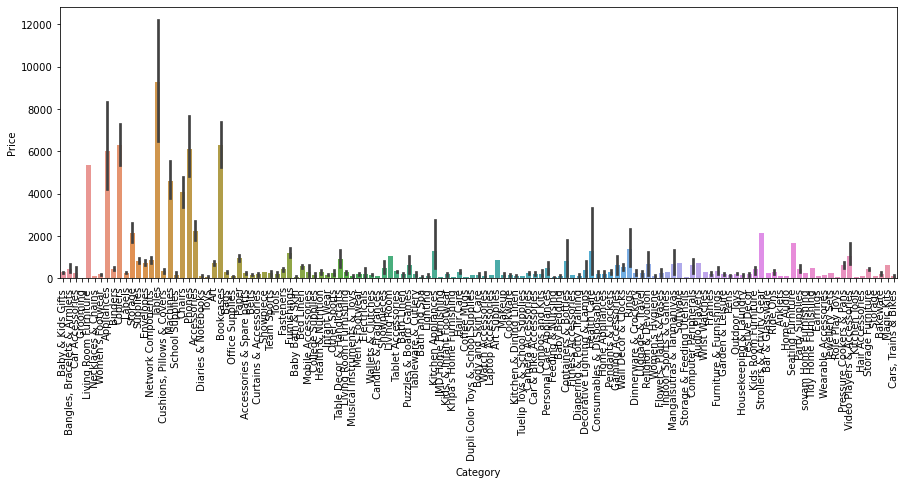

Visualizing Numerical Features with Category


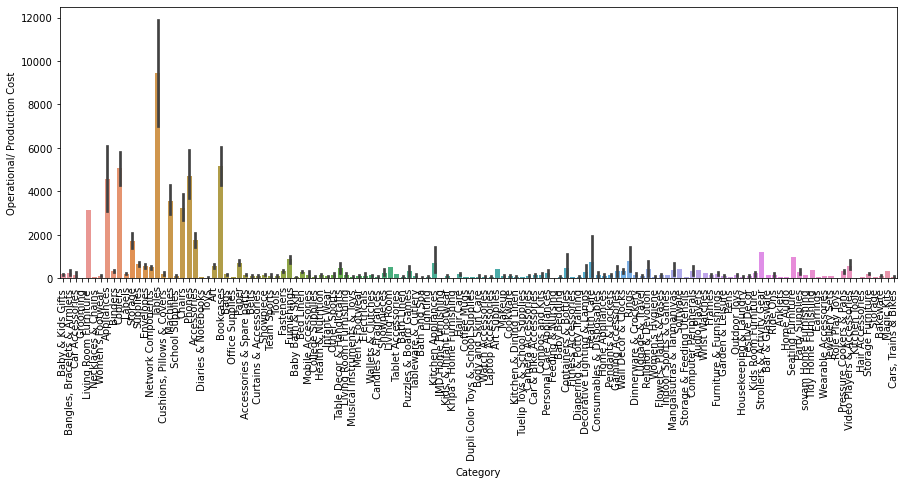

Visualizing Numerical Features with Category


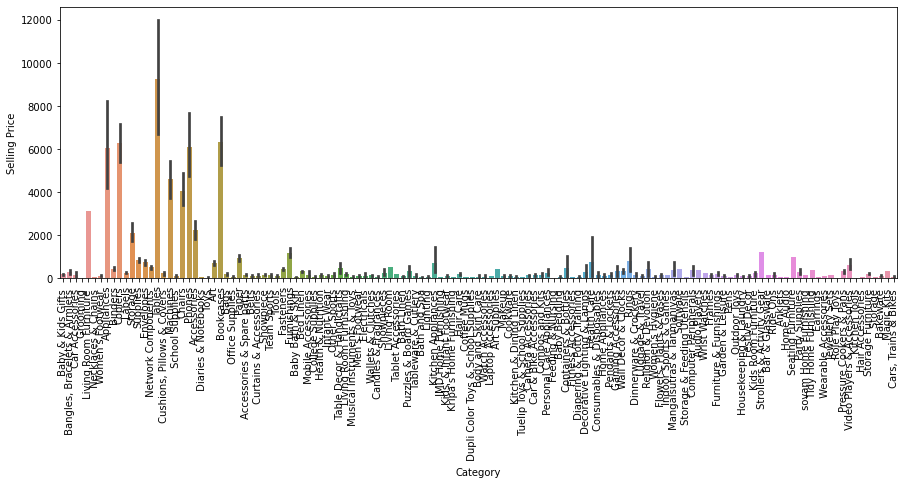

Visualizing Numerical Features with Category


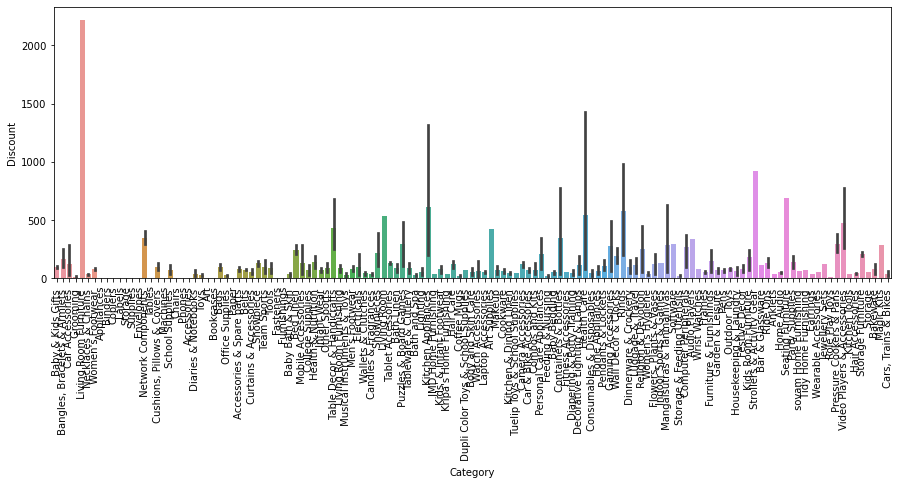

Visualizing Numerical Features with Category


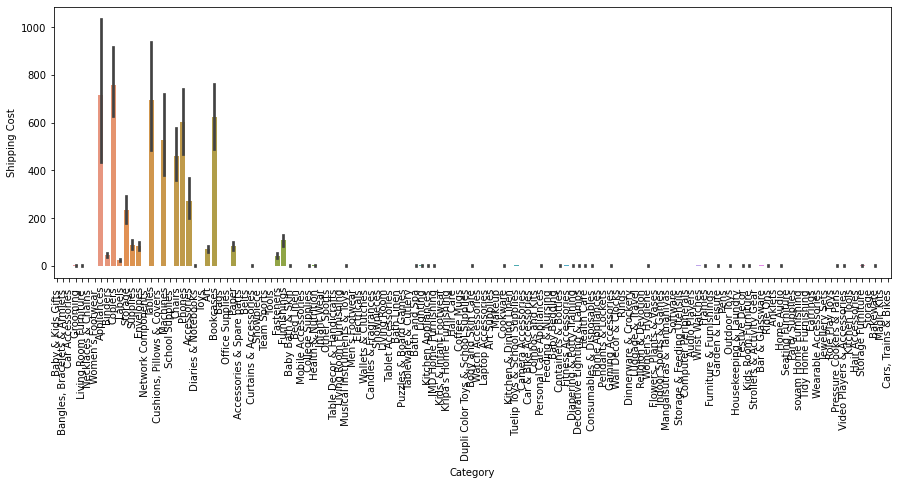

Visualizing Numerical Features with Category


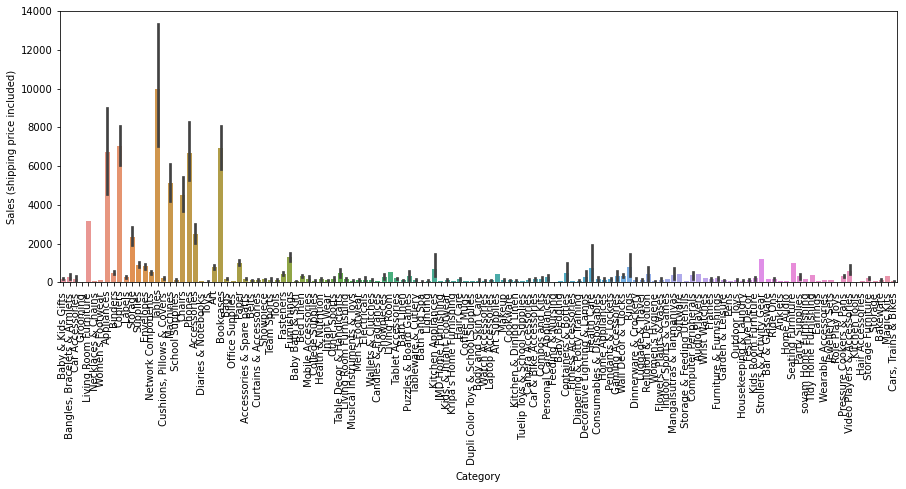

Visualizing Numerical Features with Category


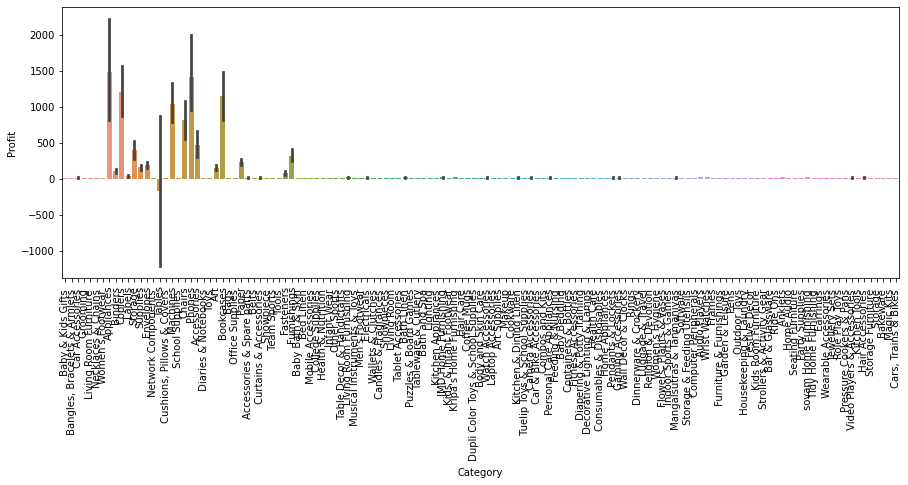

Visualizing Numerical Features with Category


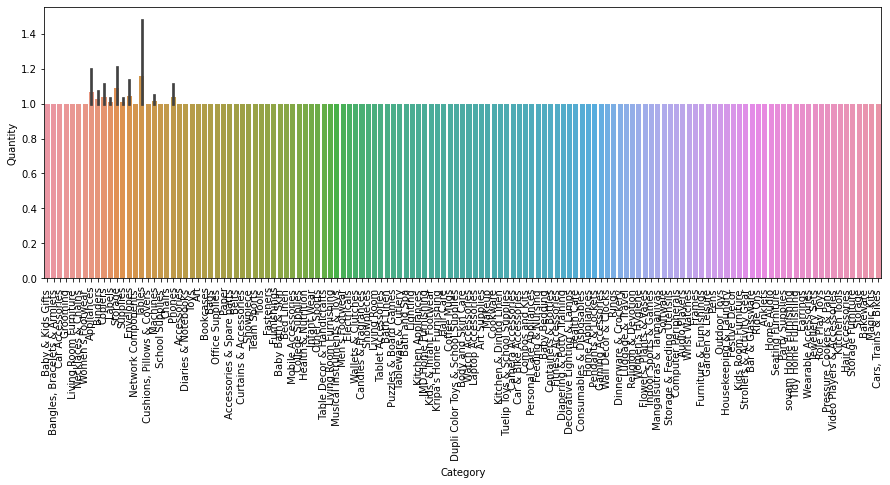

Visualizing Numerical Features with Category


In [25]:
#creating plot to Visualizing Numerical Features with Category. 
for i in df1[num_val]:
    plt.figure(figsize=(15,5))
    sns.barplot(df1['Category'],df1[i])
    plt.xticks(rotation=90)
    plt.show()
    print("Visualizing Numerical Features with Category")
    

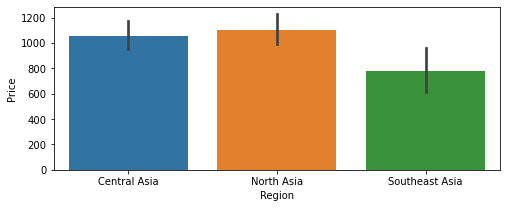

Visualizing Numerical Features with Region


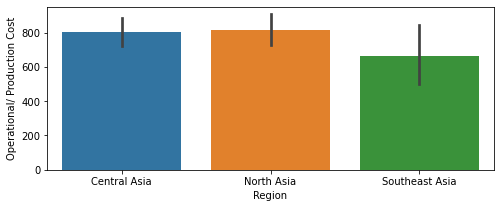

Visualizing Numerical Features with Region


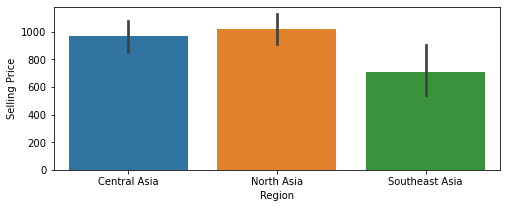

Visualizing Numerical Features with Region


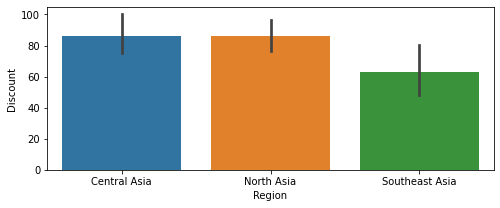

Visualizing Numerical Features with Region


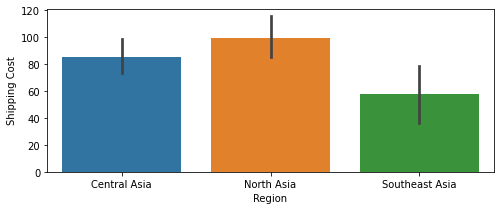

Visualizing Numerical Features with Region


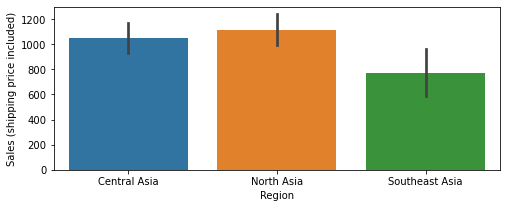

Visualizing Numerical Features with Region


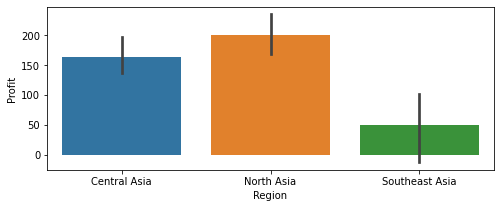

Visualizing Numerical Features with Region


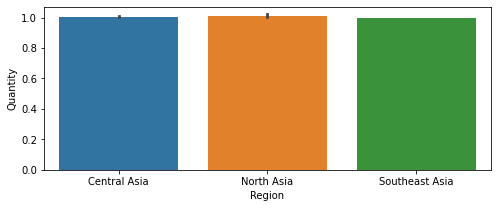

Visualizing Numerical Features with Region


In [89]:
#creating plot for Visualizing Numerical Features with Region
for i in df1[num_val]:
    plt.figure(figsize=(8,3))
    sns.barplot(df1['Region'],df1[i])
    plt.show()
    print("Visualizing Numerical Features with Region")

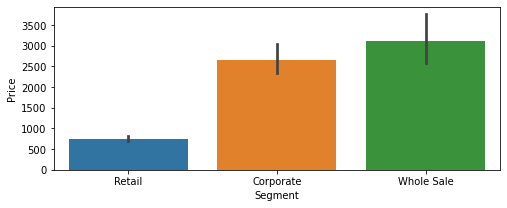

Visualizing Numerical Features with Segment


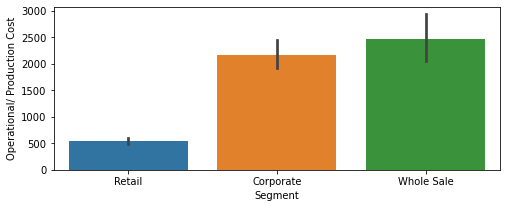

Visualizing Numerical Features with Segment


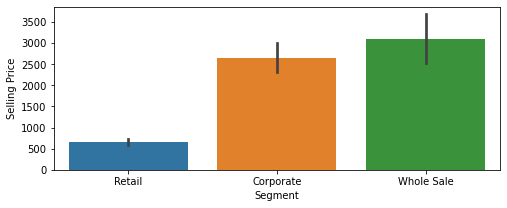

Visualizing Numerical Features with Segment


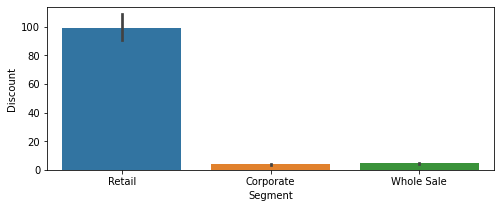

Visualizing Numerical Features with Segment


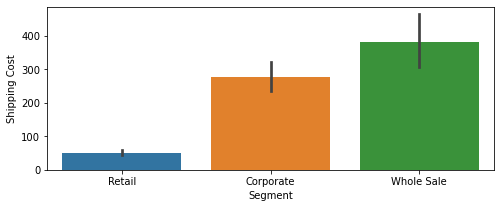

Visualizing Numerical Features with Segment


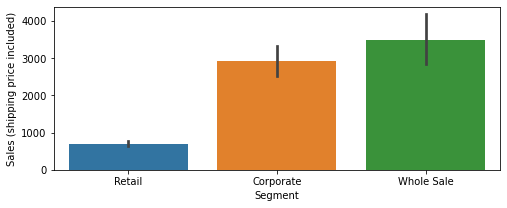

Visualizing Numerical Features with Segment


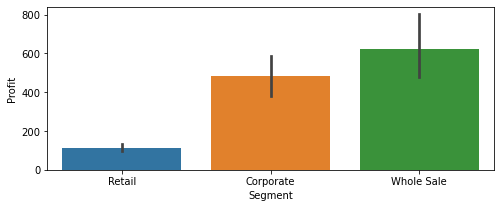

Visualizing Numerical Features with Segment


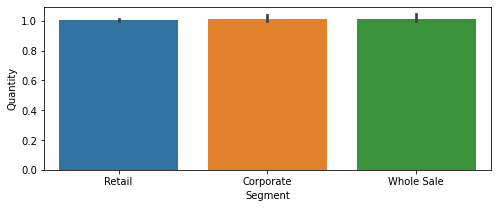

Visualizing Numerical Features with Segment


In [90]:
#creating plot for Visualizing Numerical Features with Segment.
for i in df1[num_val]:
    plt.figure(figsize=(8,3))
    sns.barplot(df1['Segment'],df1[i])
    plt.show()
    print("Visualizing Numerical Features with Segment")

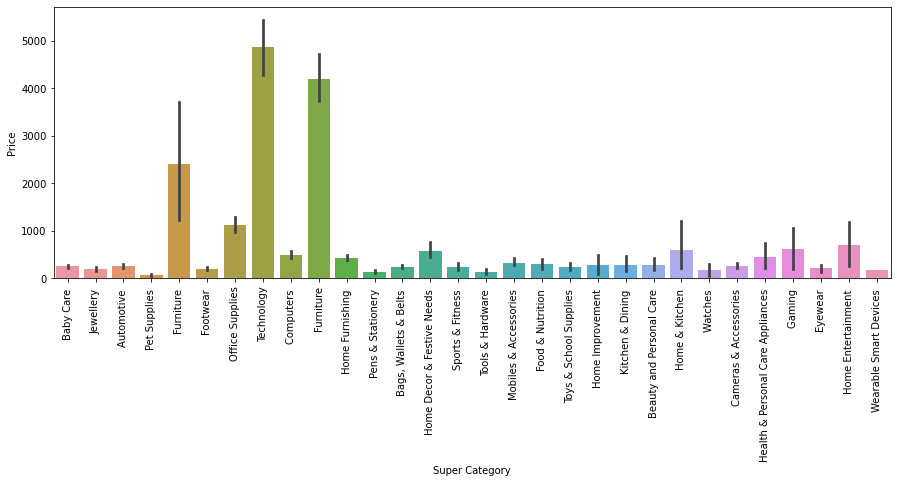

Visualizing Numerical Features with Super Category


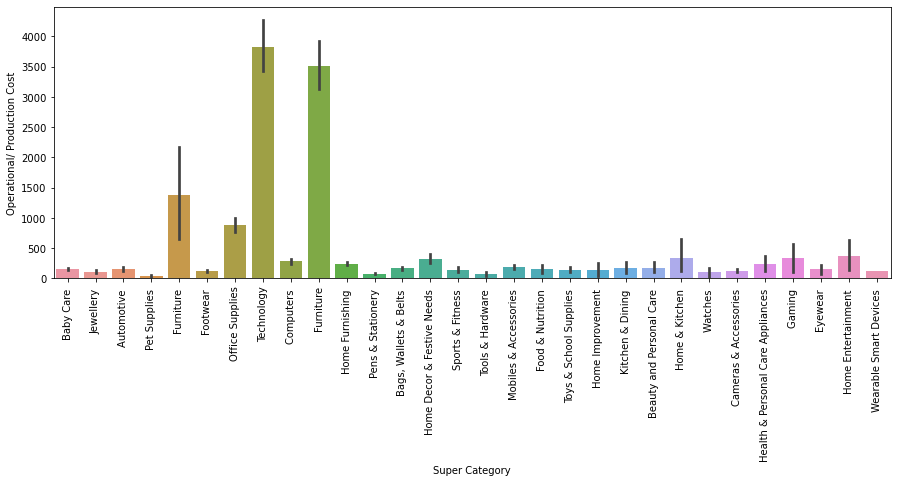

Visualizing Numerical Features with Super Category


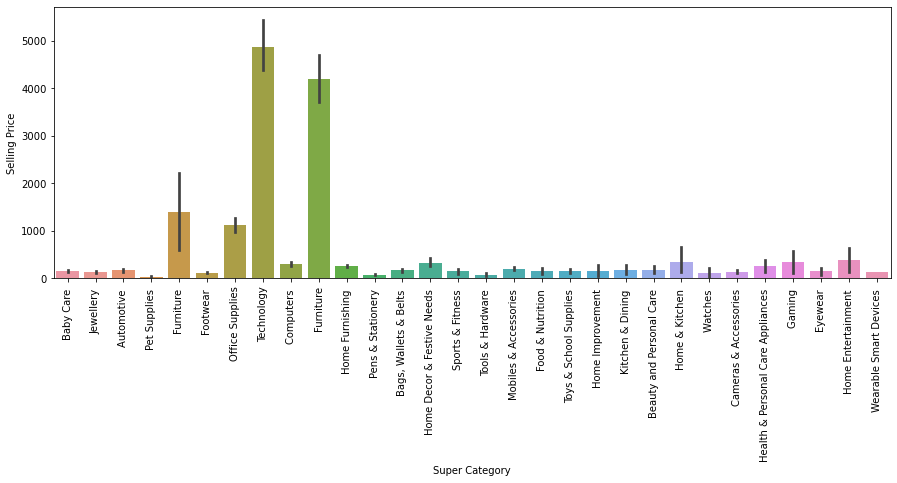

Visualizing Numerical Features with Super Category


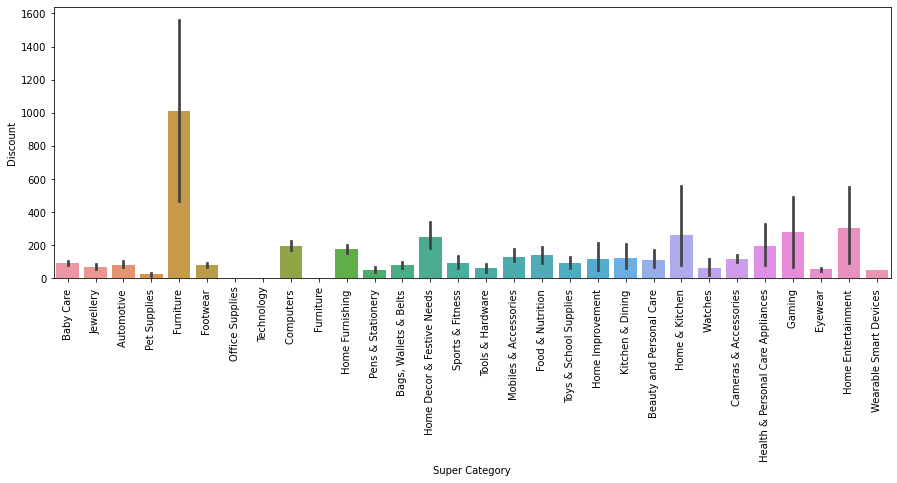

Visualizing Numerical Features with Super Category


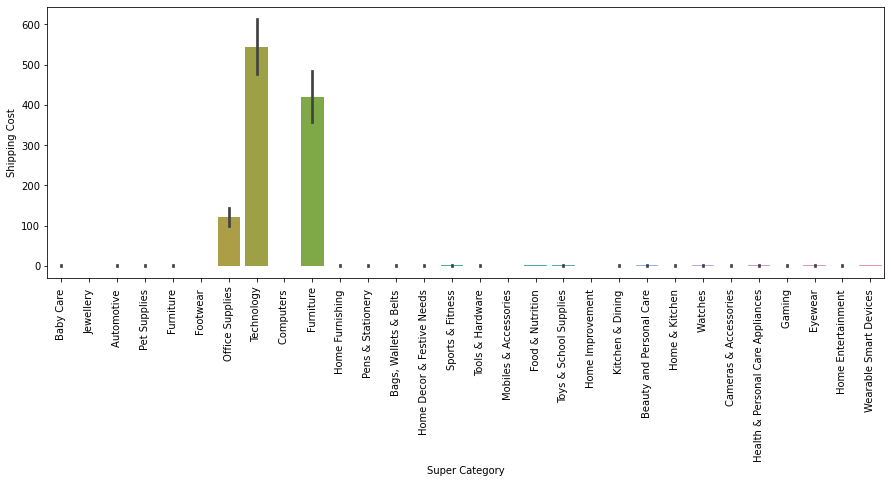

Visualizing Numerical Features with Super Category


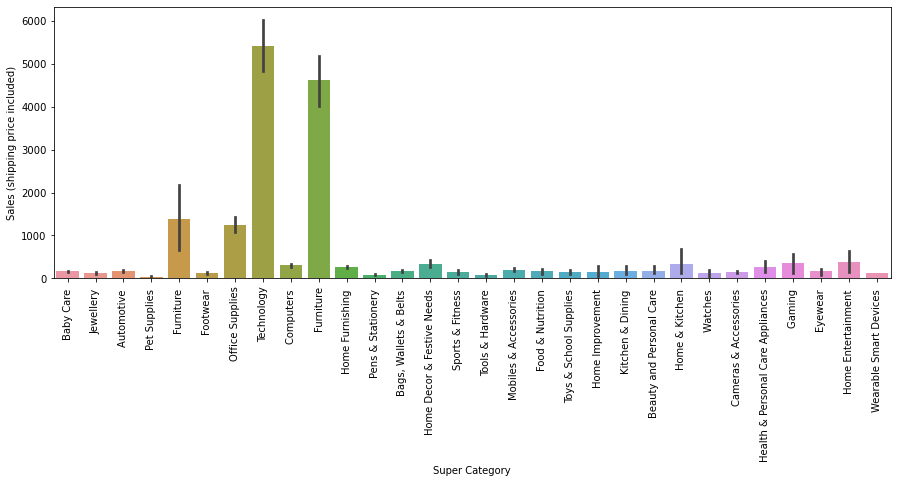

Visualizing Numerical Features with Super Category


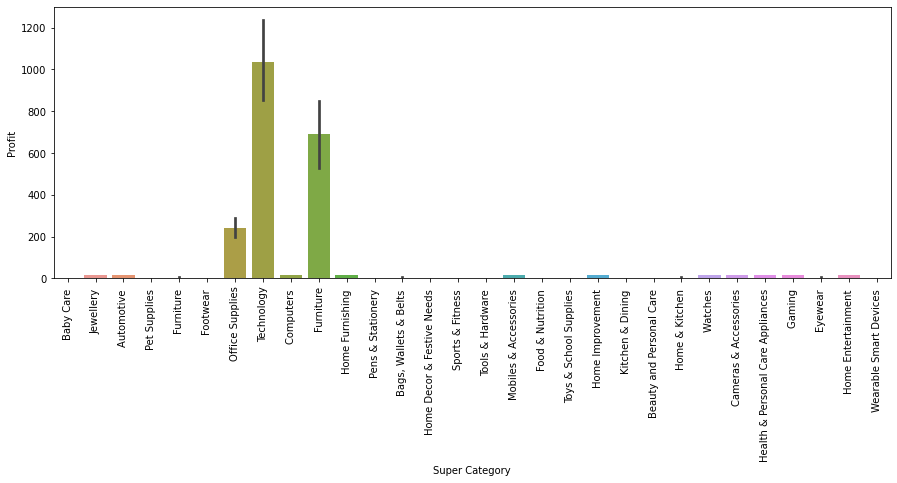

Visualizing Numerical Features with Super Category


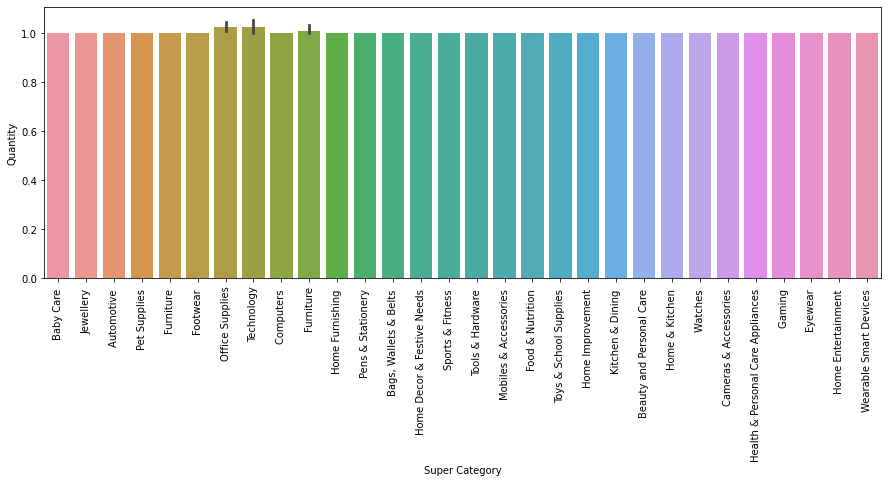

Visualizing Numerical Features with Super Category


In [87]:
#creating plots for Visualizing Numerical Features with Super Category.
for i in df1[num_val]:
    plt.figure(figsize=(15,5))
    sns.barplot(df1['Super Category'],df1[i])
    plt.xticks(rotation=90)
    plt.show()
    print("Visualizing Numerical Features with Super Category")

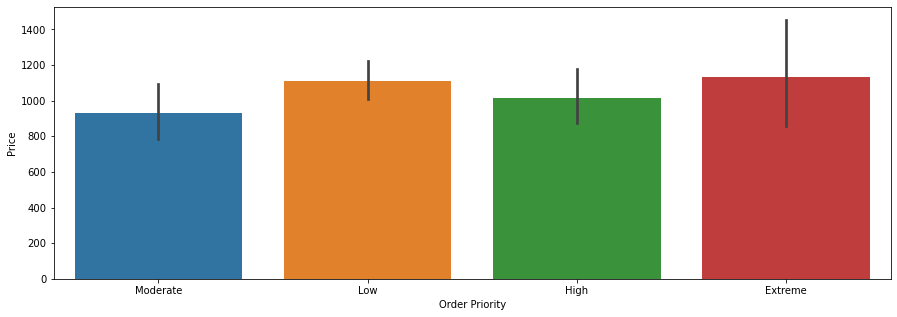

Visualizing Numerical Features with Order Priority


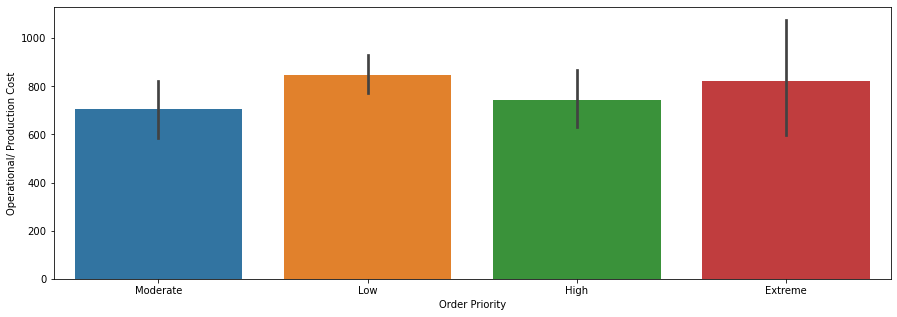

Visualizing Numerical Features with Order Priority


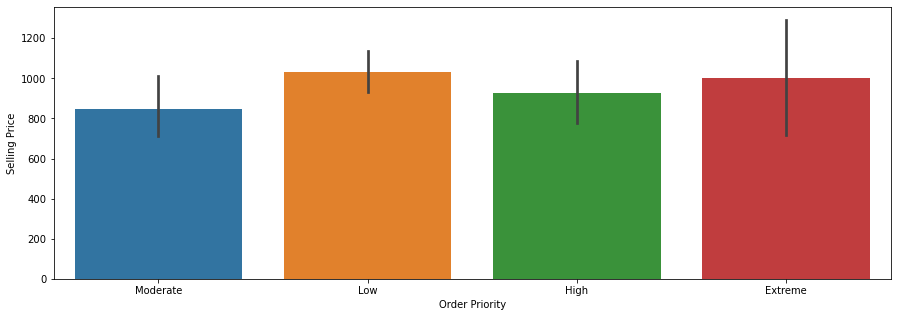

Visualizing Numerical Features with Order Priority


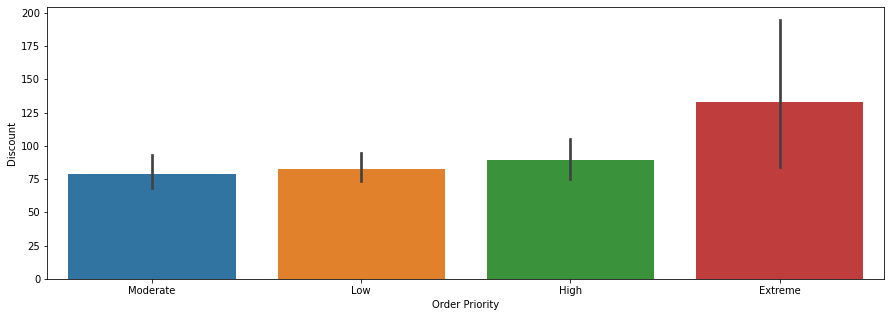

Visualizing Numerical Features with Order Priority


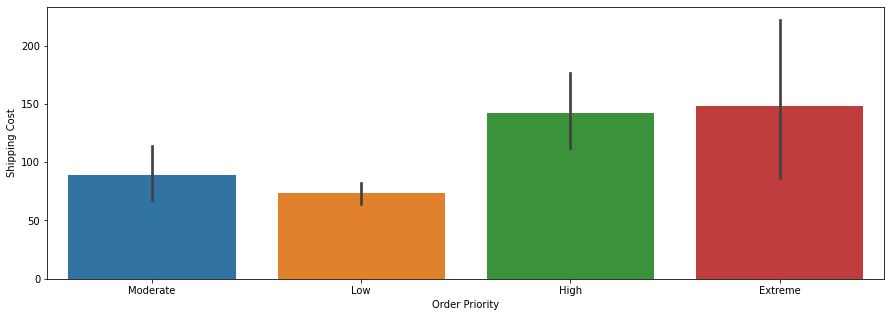

Visualizing Numerical Features with Order Priority


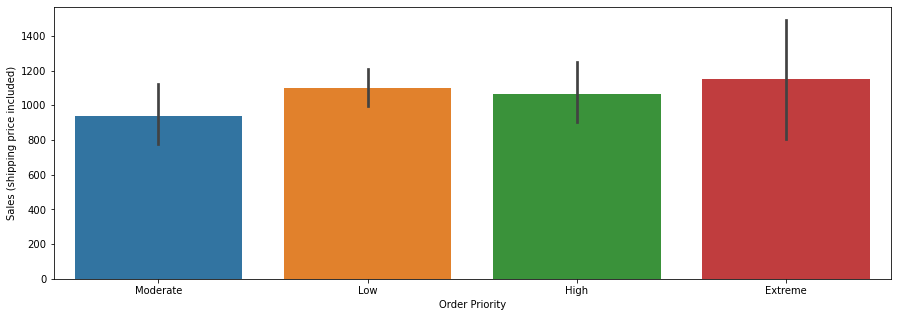

Visualizing Numerical Features with Order Priority


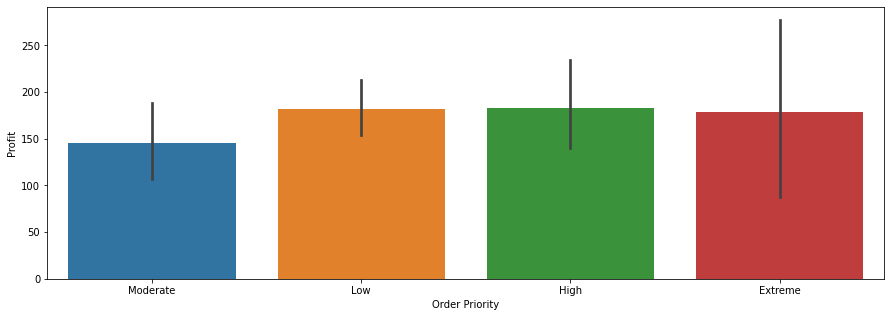

Visualizing Numerical Features with Order Priority


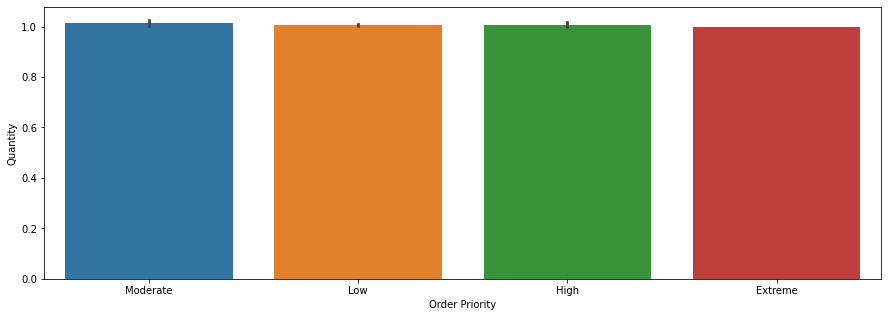

Visualizing Numerical Features with Order Priority


In [29]:
#creating plots for Visualizing Numerical Features with Order Priority.
for i in df1[num_val]:
    plt.figure(figsize=(15,5))
    sns.barplot(df1['Order Priority'],df1[i])
    plt.show()
    print("Visualizing Numerical Features with Order Priority")

In [30]:
# #creating plots for Visualizing Numerical Features with Order City. 
# for i in df1[num_val]:
#     plt.figure(figsize=(30,10))
#     sns.barplot(df1['City'],df1[i])
#     #plt.xticks(fontsize=12,rotation=90)
#     plt.show()
#     print("Visualizing Numerical Features with Order City")

In [31]:
#### j. Pair plot - All Numeric Variables 

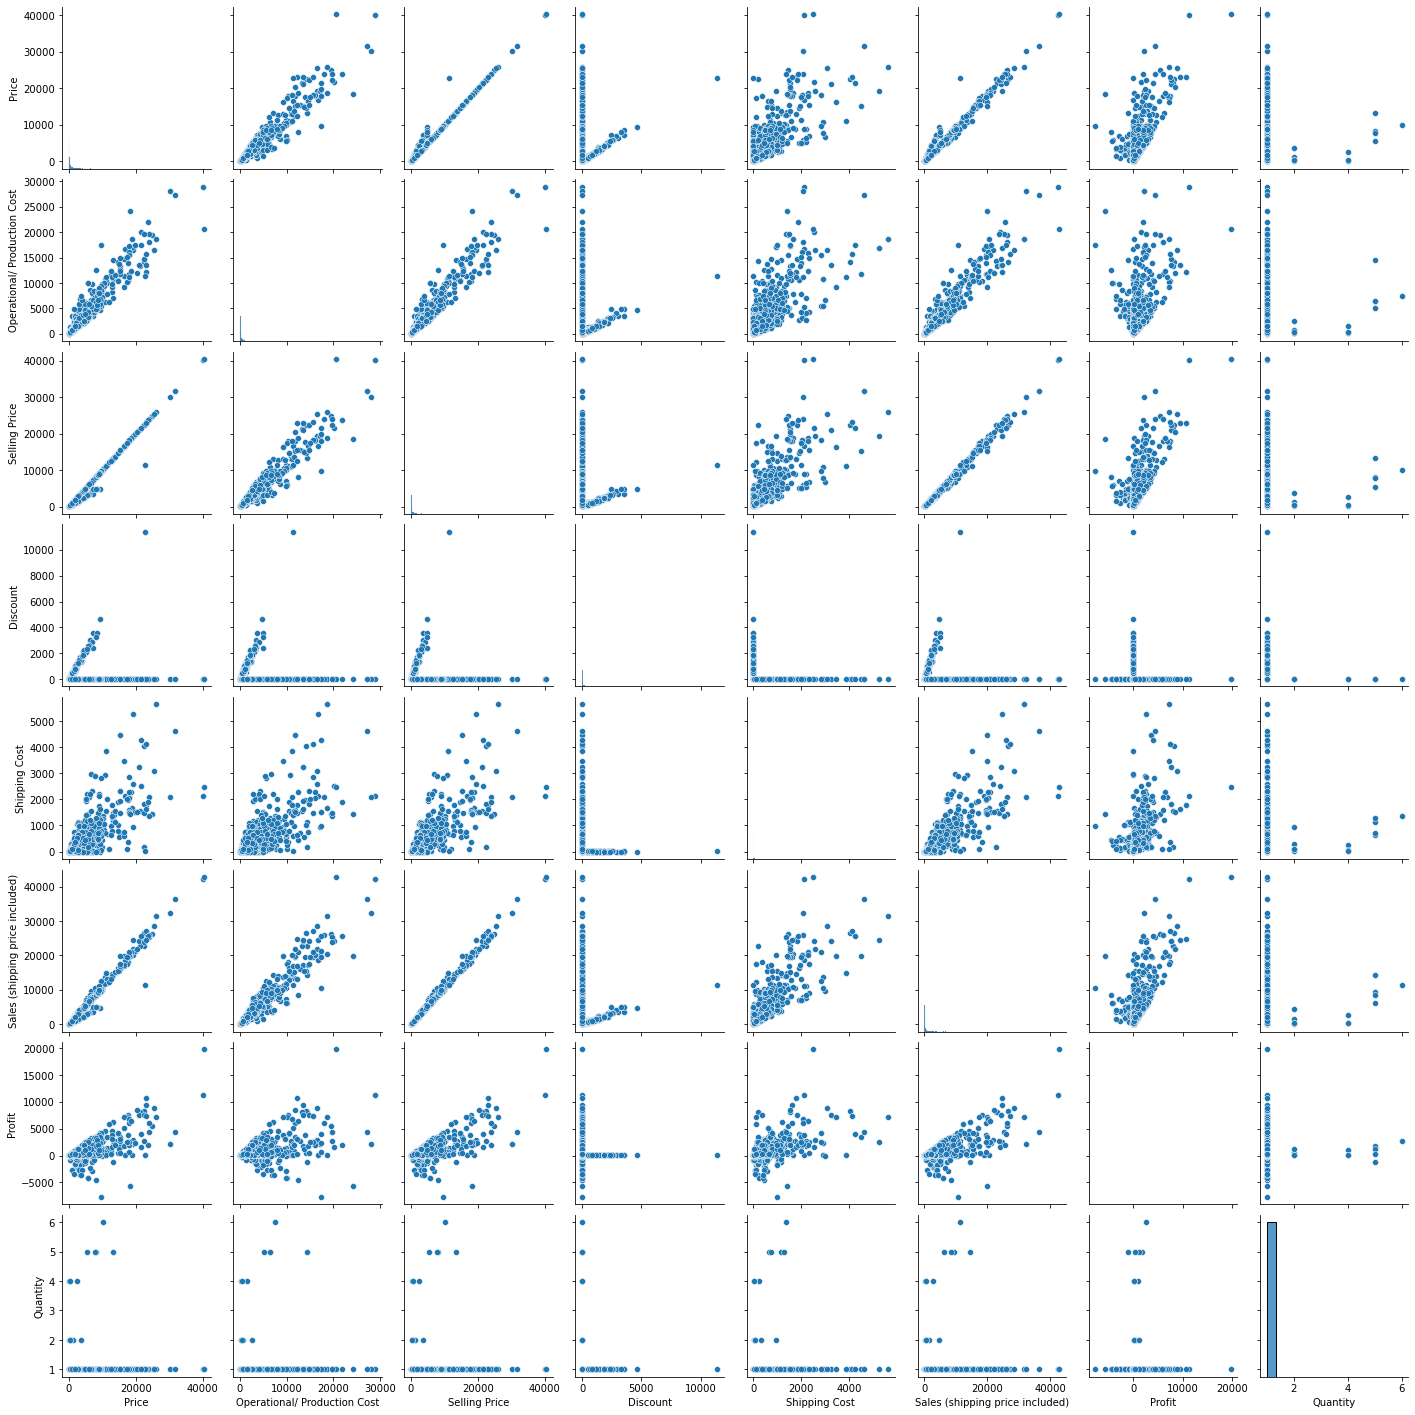

In [32]:
#creating pairplot for all numerical values present in dataset.
sns.pairplot(data=df1,palette='Pastel')
plt.show()

#### k. Line chart to show the trend of data - All Numeric/Date Variables

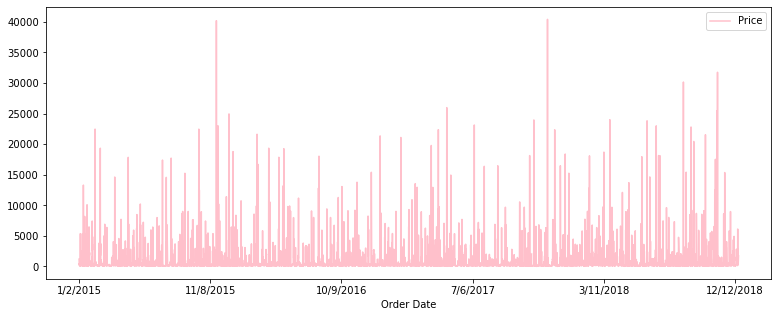

In [33]:
#linechart to find datewise price.
df1.plot(x='Order Date',y='Price',kind='line',figsize=(13,5),color='pink')
plt.show()

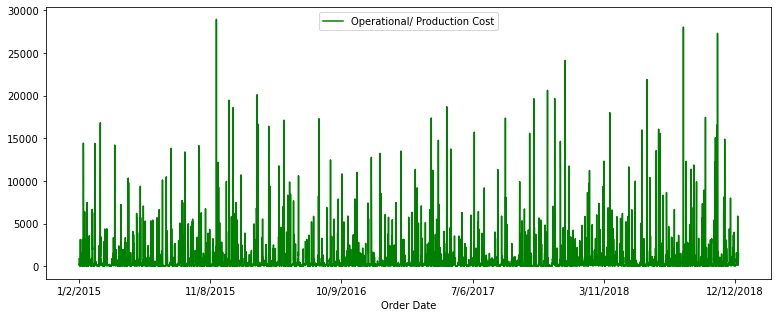

In [34]:
#linechart for production cost wise order date.
df1.plot(x='Order Date',y='Operational/ Production Cost',kind='line',figsize=(13,5),color='green')
plt.show()

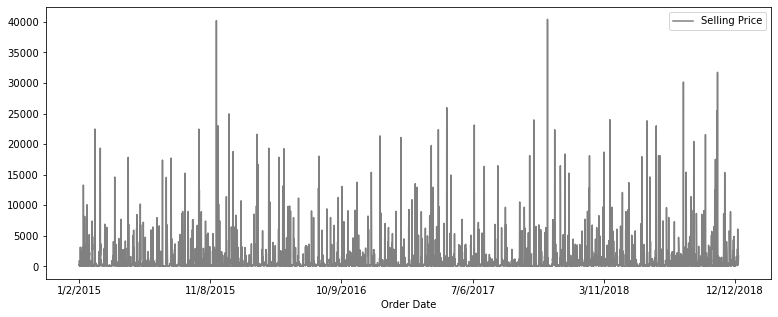

In [35]:
#linechart for production cost wise order date.
df1.plot(x='Order Date',y='Selling Price',kind='line',figsize=(13,5),color='grey')
plt.show()

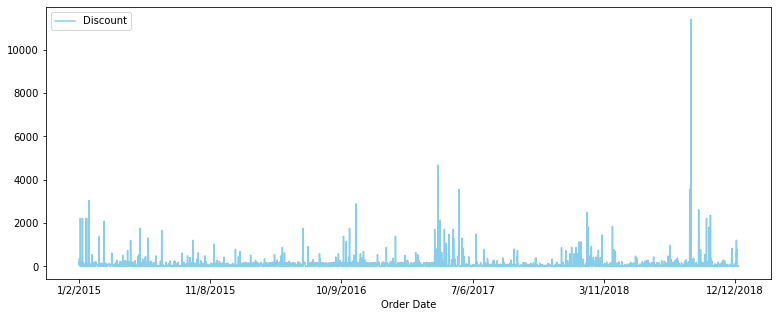

In [36]:
#linechart for production cost wise order date.
df1.plot(x='Order Date',y='Discount',kind='line',figsize=(13,5),color='skyblue')
plt.show()

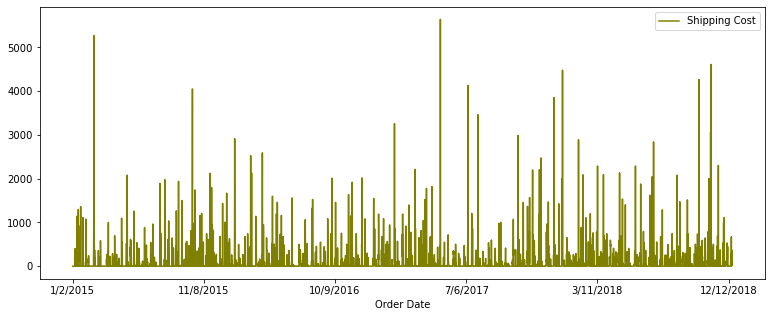

In [37]:
#linechart for production cost wise order date.
df1.plot(x='Order Date',y='Shipping Cost',kind='line',figsize=(13,5),color='olive')
plt.show()

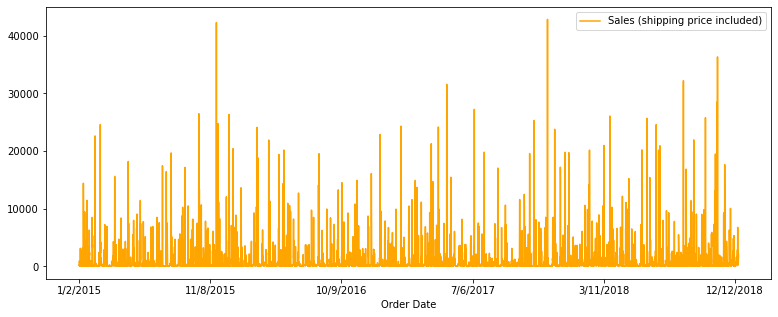

In [38]:
#linechart for production cost wise order date.
df1.plot(x='Order Date',y='Sales (shipping price included)',kind='line',figsize=(13,5),color='orange')
plt.show()

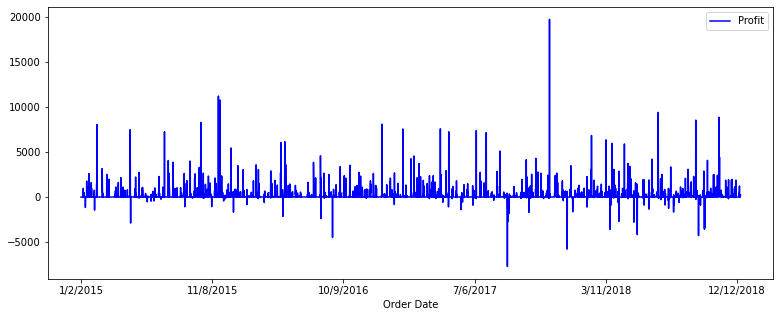

In [39]:
#linechart for production cost wise order date.
df1.plot(x='Order Date',y='Profit',kind='line',figsize=(13,5),color='blue')
plt.show()

#### l. Plot the skewness - All Numeric Variables 

In [40]:
#calculating skewness for all numerical values present in dataset.
df1.skew()

Price                               5.990278
Operational/ Production Cost        5.793953
Selling Price                       6.094681
Discount                           18.676833
Shipping Cost                       7.563378
Sales (shipping price included)     6.025352
Profit                              7.888112
Quantity                           24.827099
dtype: float64

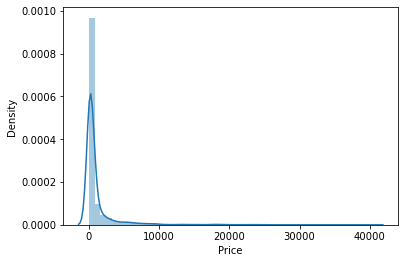

The skewness of distribution is 5.9902781261498195
The Median of this distribution 249.8039216 is greater than mean 1061.3876403327504 of this distribution


In [41]:
#plotting skewness for price.
sns.distplot(df1['Price'])
plt.show()
print('The skewness of distribution is',df1['Price'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df1.Price.median(),df1.Price.mean()))

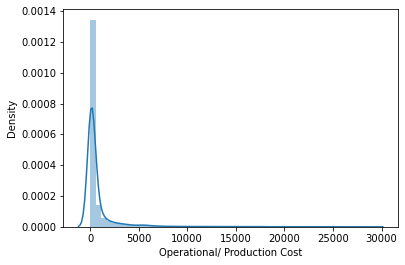

The skewness of this distribution is 5.793952720626479


In [42]:
#plotting skewness for operation/production cost.
sns.distplot(df1['Operational/ Production Cost'])
plt.show()
print('The skewness of this distribution is',df1['Operational/ Production Cost'].skew())

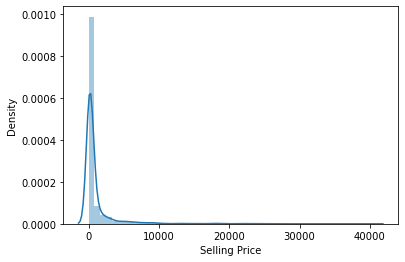

The skewness of this distribution is 6.094681162822541


In [43]:
#plotting skewness for selling price.
sns.distplot(df1['Selling Price'])
plt.show()
print('The skewness of this distribution is',df1['Selling Price'].skew())

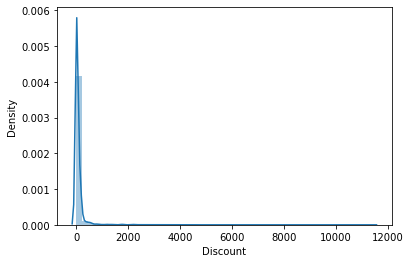

The skewness of this distribution is 18.676832960890792
The Median of this distribution 33.039215685 is greater than mean 85.07947742052261 of this distribution


In [44]:
#plotting skewness for discount.
sns.distplot(df1['Discount'])
plt.show()
print('The skewness of this distribution is',df1['Discount'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df1.Discount.median(),df1.Discount.mean()))

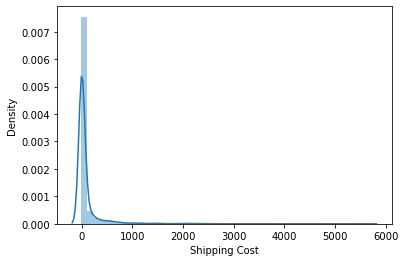

The skewness of this distribution is 7.563377633553201


In [45]:
#plotting skewness for shipping cost.
sns.distplot(df1['Shipping Cost'])
plt.show()
print('The skewness of this distribution is',df1['Shipping Cost'].skew())

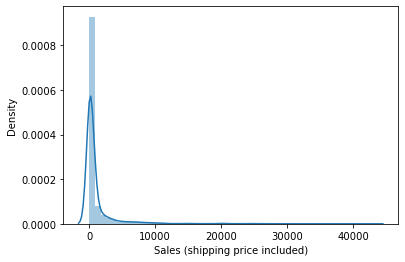

The skewness of this distribution is 6.025352230775918


In [46]:
#plotting skewness for sales.
sns.distplot(df1['Sales (shipping price included)'])
plt.show()
print('The skewness of this distribution is',df1['Sales (shipping price included)'].skew())

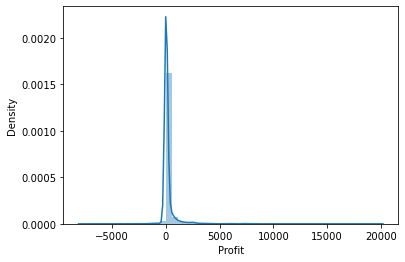

The skewness of this distribution is 7.888111909374737
The Median of this distribution 16.0 is greater than mean 174.73485024721538 of this distribution


In [47]:
#plotting skewness for profir. 
sns.distplot(df1['Profit'])
plt.show()
print('The skewness of this distribution is',df1['Profit'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df1.Profit.median(),df1.Profit.mean()))

### 2. Do certain dates in a month generate more sales consistently? 

In [48]:
#converting order date from object to datetime datatype.
df1['Order Date']=pd.to_datetime(df1['Order Date'])
df1['Order Date']

0      2015-01-02
1      2015-01-02
2      2015-01-02
3      2015-01-02
4      2015-01-02
          ...    
6423   2018-12-12
6424   2018-12-12
6425   2018-12-12
6426   2018-12-12
6427   2018-12-12
Name: Order Date, Length: 5028, dtype: datetime64[ns]

In [49]:
#seprating year from order date column and adding into dataset.
df1['Year']=df1['Order Date'].dt.year
df1['Year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [50]:
#seprating month from order date and adding into dataset.
df1['Month']=df1['Order Date'].dt.month
df1['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [51]:
#seprating days from order date column and adding new column as date into datset.
df1['Date']=df1['Order Date'].dt.day
df1['Date'].unique()

array([ 2,  6,  7,  8,  9, 11,  4,  5, 12,  3, 10,  1], dtype=int64)

In [58]:
df1.groupby('Month')['Sales (shipping price included)'].sum()

Month
1     529002.730307
2     539427.247275
3     361343.586861
4     511475.279974
5     311550.801861
6     497899.123418
7     482308.599637
8     384245.644403
9     359932.350907
10    308537.324698
11    526638.700927
12    545452.705257
Name: Sales (shipping price included), dtype: float64

In [59]:
#sorting values saleswise.
sort_val= df1.sort_values('Sales (shipping price included)',ascending=False)

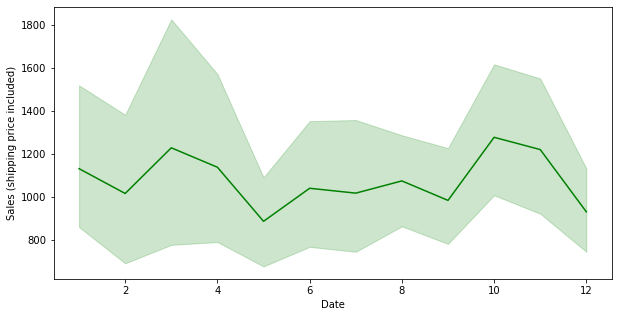

In [60]:
#plotting barplot to check datewise sales to find out the consistency.
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='Sales (shipping price included)',data=sort_val,color='Green')
plt.show()

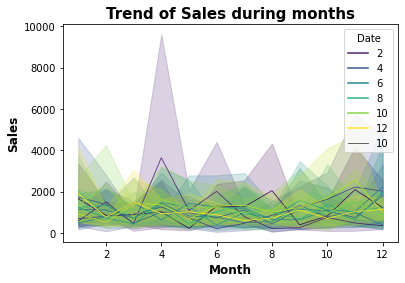

In [65]:
sns.lineplot(x ='Month', y ='Sales (shipping price included)', hue = 'Date', data = df1, palette = 'viridis',size=10)
plt.title('Trend of Sales during months', weight = 'bold', fontsize = 15)
plt.xlabel('Month', fontsize = 12, weight = 'bold')
plt.ylabel('Sales', fontsize = 12, weight = 'bold')
plt.show() 

### 3. Top 5 performing cities in terms of Sales .

In [66]:
#finding maximum ant spent by customers.
top_city = df1.groupby(by=['City'], as_index=False)['Sales (shipping price included)'].sum().head()
top_city

,City,Sales (shipping price included)
0,Agra,64005.452105
1,Ajmer,28219.323143
2,Akola,13069.196445
3,Aligarh,34011.120604
4,Allahabad,36887.762077


In [67]:
#sorting values.
top_city.sort_values(by='Sales (shipping price included)', ascending=False).head()

,City,Sales (shipping price included)
0,Agra,64005.452105
4,Allahabad,36887.762077
3,Aligarh,34011.120604
1,Ajmer,28219.323143
2,Akola,13069.196445


### 4. Top 5 performing cities in terms of Profit 

In [68]:
#creating variable for top performing cities.
top_profit = df1.groupby(by=['City'], as_index=False)['Profit'].sum().head()
top_profit

,City,Profit
0,Agra,10512.8193
1,Ajmer,4160.7800
2,Akola,3749.0111
3,Aligarh,3031.9628
4,Allahabad,11386.0087


In [69]:
#sorting values.
top_profit.sort_values(by='Profit', ascending=False).head()

,City,Profit
4,Allahabad,11386.0087
0,Agra,10512.8193
1,Ajmer,4160.7800
2,Akola,3749.0111
3,Aligarh,3031.9628


### 5. Top 5 Performing Segments in terms of sales

In [70]:
#creating values for top segments.
top_segment=df1.groupby(by=['Segment'],as_index=False)['Sales (shipping price included)'].sum().head()
top_segment

,Segment,Sales (shipping price included)
0,Corporate,1.372237e+06
1,Retail,3.022525e+06
2,Whole Sale,9.630521e+05


In [71]:
#sorting values.
top_segment.sort_values(by='Sales (shipping price included)', ascending=False).head()

,Segment,Sales (shipping price included)
1,Retail,3.022525e+06
0,Corporate,1.372237e+06
2,Whole Sale,9.630521e+05


### 6. What is the average profit across all categories?

In [72]:
#grouping values.
df1.groupby('Category')['Profit'].mean()

Category
 Accessories & Spare parts       15.900000
 Anklets                         18.000000
 Art Supplies                     5.000000
 Audio Players                   18.000000
 Baby & Kids Gifts                4.044118
                                  ...     
Paper                           229.571619
Phones                         1407.537967
Storage                         400.672715
Supplies                        157.109466
Tables                         -165.446543
Name: Profit, Length: 133, dtype: float64

### 7. What is the average sales across all categories? 

In [73]:
#grouping values.
avg_cat=df1.groupby('Category',as_index=False)['Sales (shipping price included)'].mean()

In [74]:
sort_cat=avg_cat.sort_values('Category',ascending=False)

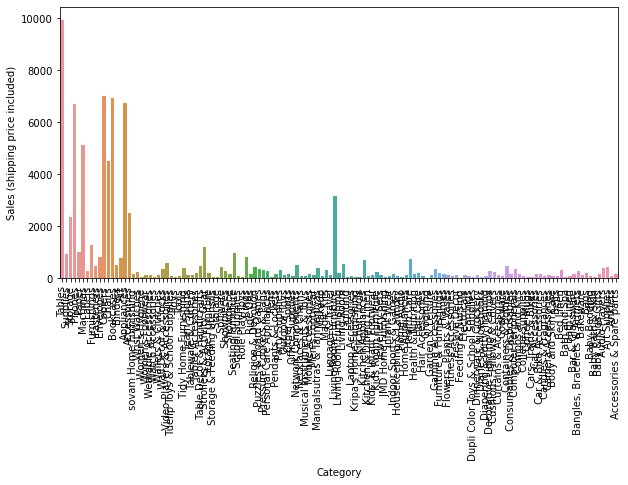

In [75]:
#plotting graph for avg sales.
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Sales (shipping price included)',data=sort_cat)
plt.xticks(rotation=90)
plt.show()

### 8. Which state provides more discount and what is the average sales trend of that state in the last 6 months? 

In [80]:
#Which state provides more discount.
st_dis= df1.groupby(by=['State'], as_index=False)['Discount'].sum()
st_dis.head()

,State,Discount
0,Andhra Pradesh,3831.914706
1,Anhui,10352.992352
2,Assam,2374.657451
3,Baluchistan,954.069216
4,Beijing,2410.785490


In [77]:
#sorting values.
st_dis.sort_values(by=['Discount'],ascending=False).head()

,State,Discount
39,Maharashtra,30556.852451
16,Guangdong,28647.260450
56,Tamil Nadu,27247.014704
43,Punjab,24944.935450
33,Karnataka,19218.729804


In [78]:
# what is the average sales trend of that state in the last 6 month.
last6 = (df1['Order Date'] > '12-06-2018') & (df1['Order Date'] <= '12-12-2018')
  
# locate rows and access them using .loc() function
last6 = df1.loc[last6]

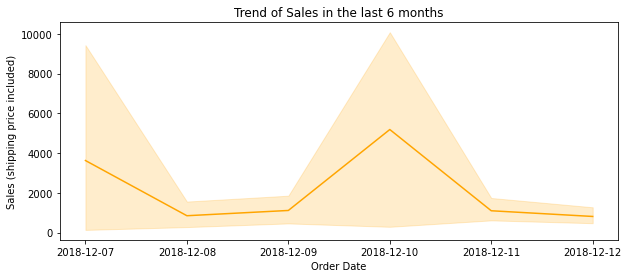

In [79]:
#plotting line graph to see the trend of sales for last 6 month.
plt.figure(figsize=(10,4))
sns.lineplot(x="Order Date",  y = 'Sales (shipping price included)',data =last6,color='orange')
plt.title("Trend of Sales in the last 6 months")
plt.show()

### 9. Trend of Profit vs Sales in the last 12 months

In [81]:
#fetching sales data of year 2018 from all years.
last12 = (df1['Order Date'] > '01-01-2018') & (df1['Order Date'] <= '12-12-2018')
  
# locate rows and access them using .loc() function
last12 = df1.loc[last12]

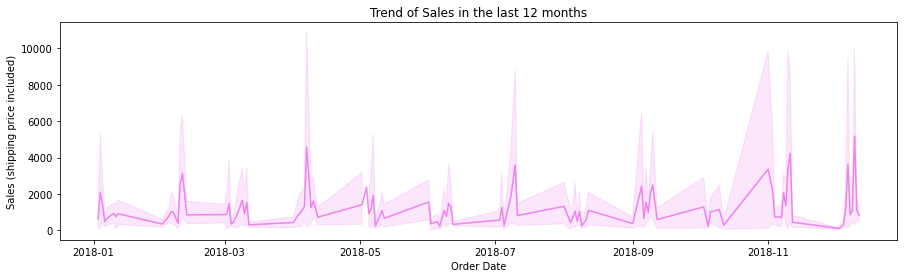

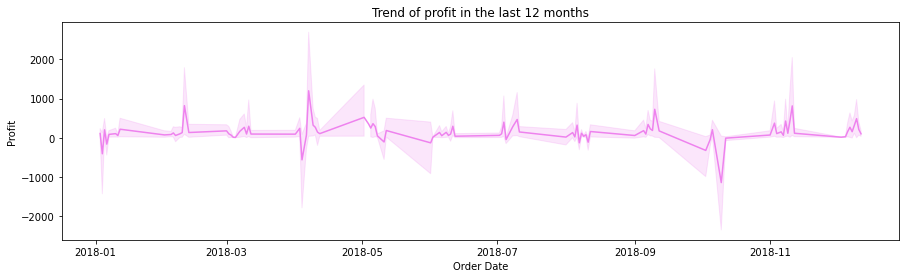

In [82]:
#plotting graph for profit and sales to see the trend in last 12 month.
plt.figure(figsize=(15,4))
sns.lineplot(x="Order Date",  y = 'Sales (shipping price included)',data =last12,color='violet')
plt.title("Trend of Sales in the last 12 months")
plt.show()

plt.figure(figsize=(15,4))
sns.lineplot(x="Order Date",  y = 'Profit',data =last12,color='violet')
plt.title("Trend of profit in the last 12 months")
plt.show()

### 10. Do selling more quantities increase sales? If there are cities where selling more quantities is reducing the sales, please specify them.

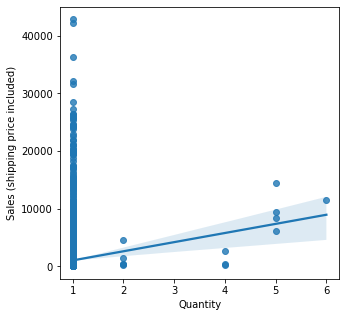

In [83]:
#creating scatterplot for quantity and sales.
plt.figure(figsize=(5,5))
sns.regplot(x='Quantity',y='Sales (shipping price included)',data=df1)
plt.show()

As we can observe from the graph selling more quantities incresed sales.

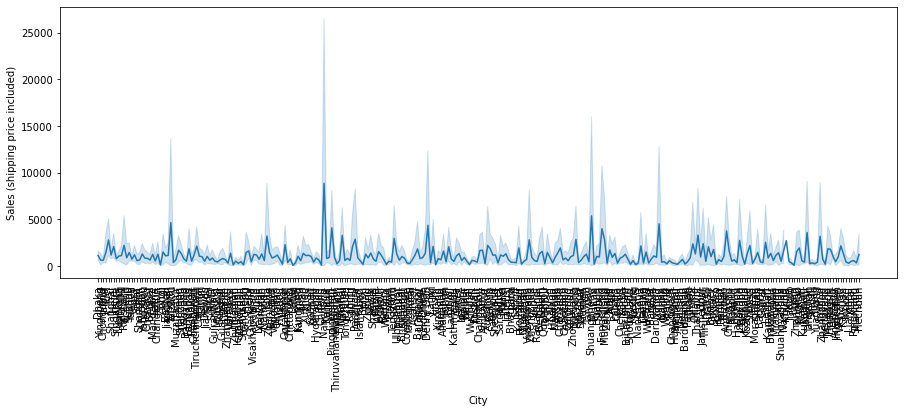

In [84]:
#checking the relation between city and quantity sold.
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.lineplot(x='City',y='Sales (shipping price included)',data=df1)
plt.show()

In [85]:
#grouping values to check the details.
df1.groupby('City')['Sales (shipping price included)'].sum().head()

City
Agra         64005.452105
Ajmer        28219.323143
Akola        13069.196445
Aligarh      34011.120604
Allahabad    36887.762077
Name: Sales (shipping price included), dtype: float64

In [86]:
#to find out city grouping sales and quantity alongwith city.
sort_quant=df1.groupby('City')['Quantity','Sales (shipping price included)'].sum().head()
sort_quant

,Quantity,Sales (shipping price included)
City,,
Agra,53,64005.452105
Ajmer,21,28219.323143
Akola,12,13069.196445
Aligarh,22,34011.120604
Allahabad,23,36887.762077


In [91]:
#sorting values by quantity.
sort_quant.sort_values('Quantity',ascending=False)

,Quantity,Sales (shipping price included)
City,,
Agra,53,64005.452105
Allahabad,23,36887.762077
Aligarh,22,34011.120604
Ajmer,21,28219.323143
Akola,12,13069.196445


from above details we can say Quantity have positive relation with Sales as the quantity increasing sales are increasing as well.

### 11. Best performing states in every region – Plot two charts for sales and profit.

In [92]:
#sorting values.
df_sort= df1.sort_values('Sales (shipping price included)',ascending=False)

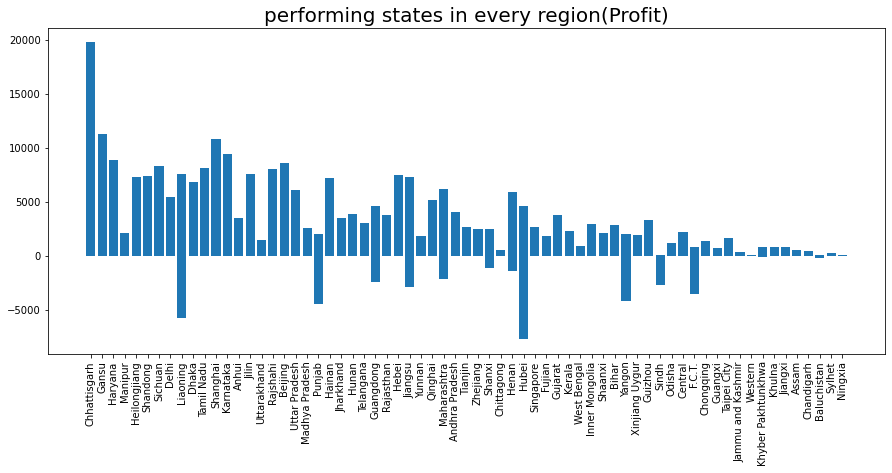

In [93]:
#plotting graph for state and profit.
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.bar('State', 'Profit',data=df_sort,)
plt.title("performing states in every region(Profit)", size=20)
plt.show()

In [94]:
#sorting values.
df1_sort= df1.sort_values('Sales (shipping price included)',ascending=False)

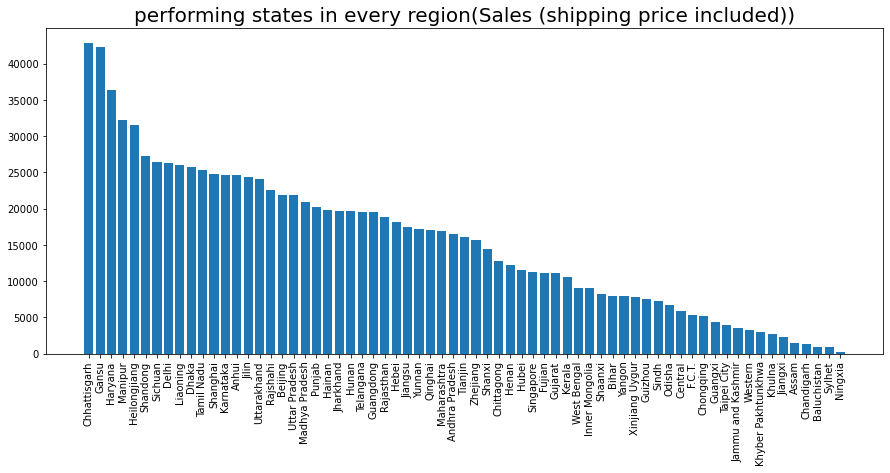

In [95]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.bar('State', 'Sales (shipping price included)',data=df1_sort)
plt.title("performing states in every region(Sales (shipping price included))", size=20)
plt.show()

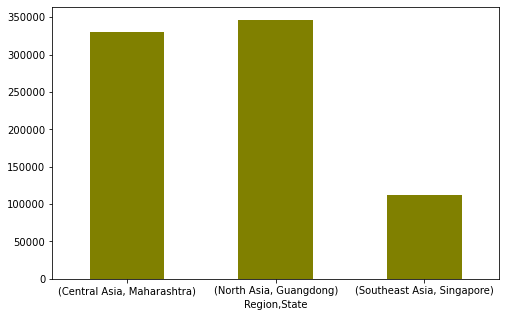

In [100]:
#plotting bargraph.
plt.figure(figsize=(8,5))
Top_State_Sales=df1.groupby(['Region','State']).sum()
Top_State_Sales['Sales (shipping price included)'].groupby(level=0, group_keys=False).nlargest(1).plot(kind = "bar",color='olive')
plt.xticks(rotation='horizontal')
plt.show() 

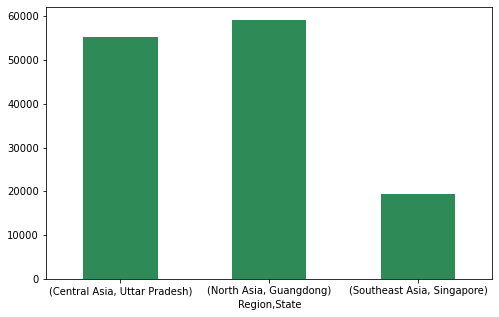

In [101]:
#plotting barplot for profit.
plt.figure(figsize=(8,5))
Top_State_Profit=df1.groupby(['Region','State']).sum()
Top_State_Profit['Profit'].groupby(level=0, group_keys=False).nlargest(1).plot(kind = "bar",color='seagreen') 
plt.xticks(rotation='horizontal')
plt.show()

### 12. Does Shipping cost impact profit? 

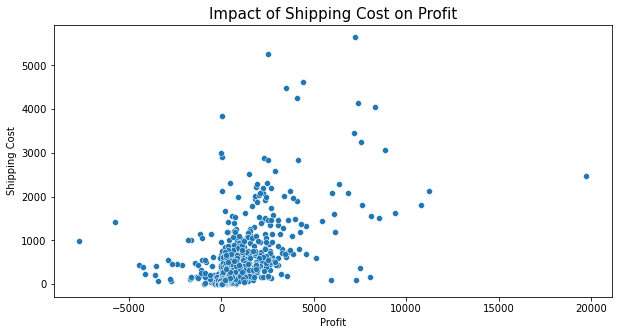

In [102]:
#creating scatterplot to check the impact of shipping cost on profit.
plt.figure(figsize=(10,5))
sns.scatterplot(x='Profit',y='Shipping Cost',data=df1)
plt.title('Impact of Shipping Cost on Profit',size=15)
plt.show()

From the above observation we can see that shipping cost having 

### 13. What are the categories with higher MRP and what is the profit ratio for the same? 

In [104]:
#category wise price calculation.
sort_price=df1.sort_values('Price',ascending=False)

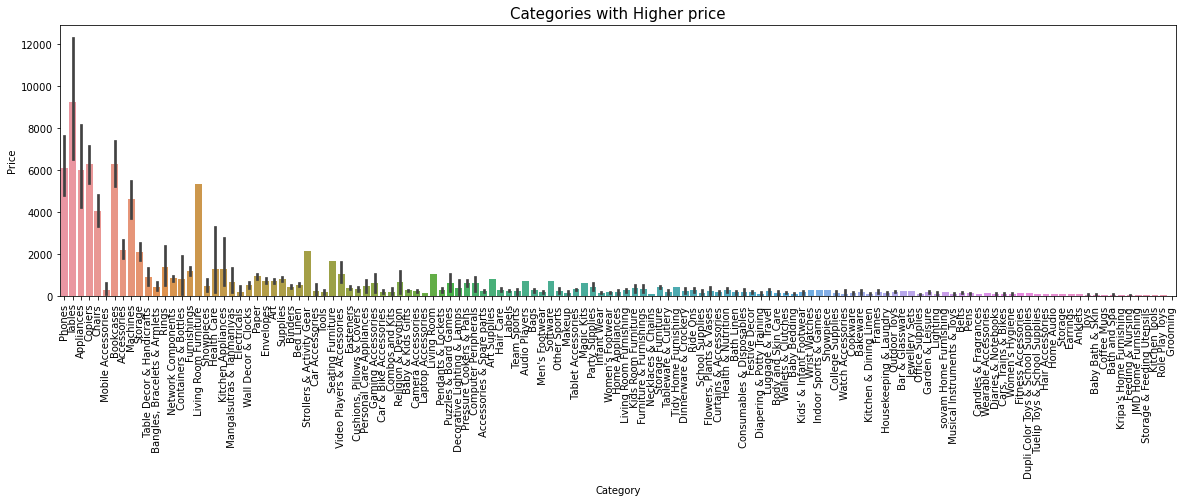

In [105]:
#plotting barplot to check categories with higher price.
plt.figure(figsize=(20,5))
sns.barplot(x='Category',y='Price',data=sort_price)
plt.xticks(rotation=90)
plt.title('Categories with Higher price',fontsize=15)
plt.show()

From this barplot we can see highest MRP categories are 
* phones
* tables
* Appliances
* copier
* chairs

In [106]:
#creating new dataframe to calculate profit ratio.
new_df=df1[["Shipping Cost","Profit","Sales (shipping price included)","Discount"]]
new_df.head()

,Shipping Cost,Profit,Sales (shipping price included),Discount
0,-1.0,4.0,869.294118,334.705882
1,1.0,3.0,324.823529,204.411765
2,0.0,3.0,145.098039,70.588235
3,0.0,5.0,323.823529,204.411765
4,1.0,5.0,77.372549,61.078431


In [107]:
#calculating all over expenses.
new_df['Expense']=new_df['Discount']+new_df['Shipping Cost']
new_df['Expense'].head()

0    333.705882
1    205.411765
2     70.588235
3    204.411765
4     62.078431
Name: Expense, dtype: float64

In [108]:
#calculating profit ratio.
new_df['Profit Ratio']=new_df['Sales (shipping price included)']-new_df['Expense']/new_df['Sales (shipping price included)']
new_df['Profit Ratio'].head()

0    868.910236
1    324.191150
2    144.611553
3    323.192285
4     76.570218
Name: Profit Ratio, dtype: float64

In [109]:
#printing new dataframe for the above calculations.
new_df.head()

,Shipping Cost,Profit,Sales (shipping price included),Discount,Expense,Profit Ratio
0,-1.0,4.0,869.294118,334.705882,333.705882,868.910236
1,1.0,3.0,324.823529,204.411765,205.411765,324.191150
2,0.0,3.0,145.098039,70.588235,70.588235,144.611553
3,0.0,5.0,323.823529,204.411765,204.411765,323.192285
4,1.0,5.0,77.372549,61.078431,62.078431,76.570218


### ---------------------------------------------End OF Project ---------------------------------------